In [ ]:
!pip install optuna

In [ ]:
!pip install pycaret

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
from pycaret.classification import *
import os
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
train=pd.read_csv('/Train_data.csv')
test=pd.read_csv('/Test_data.csv')

In [ ]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.describe(include='object')


,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [ ]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")


Number of duplicate rows: 0


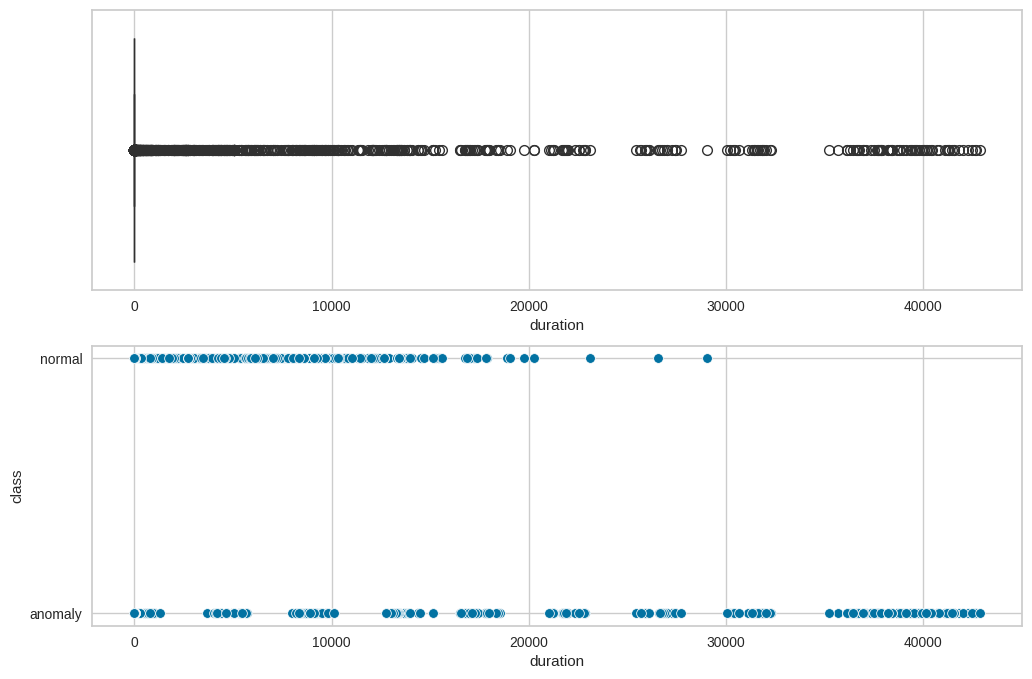

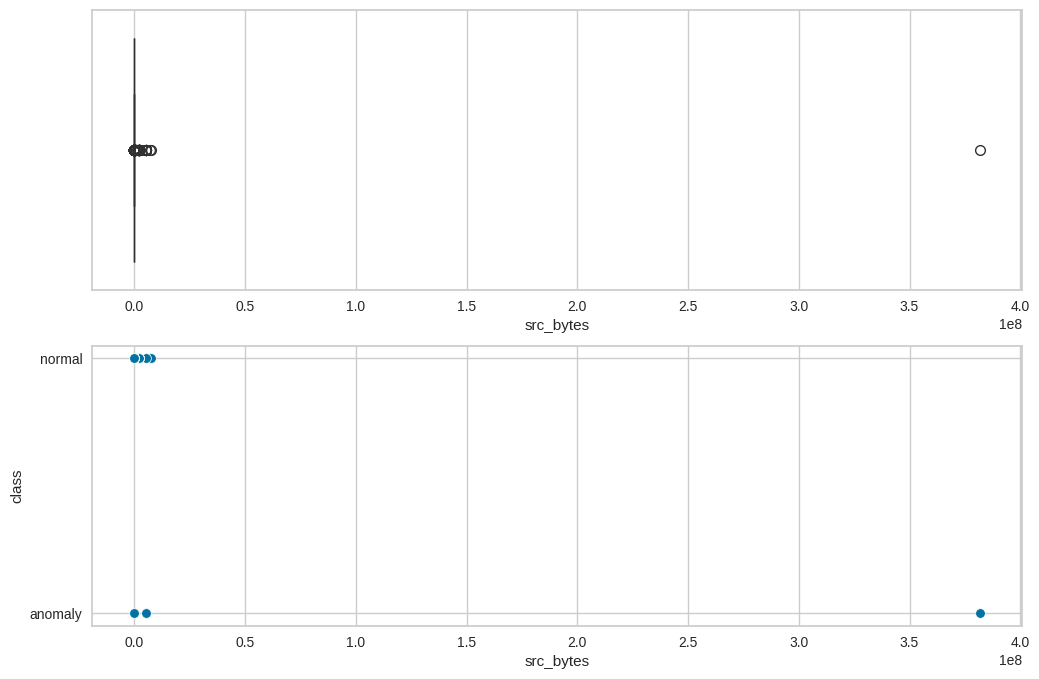

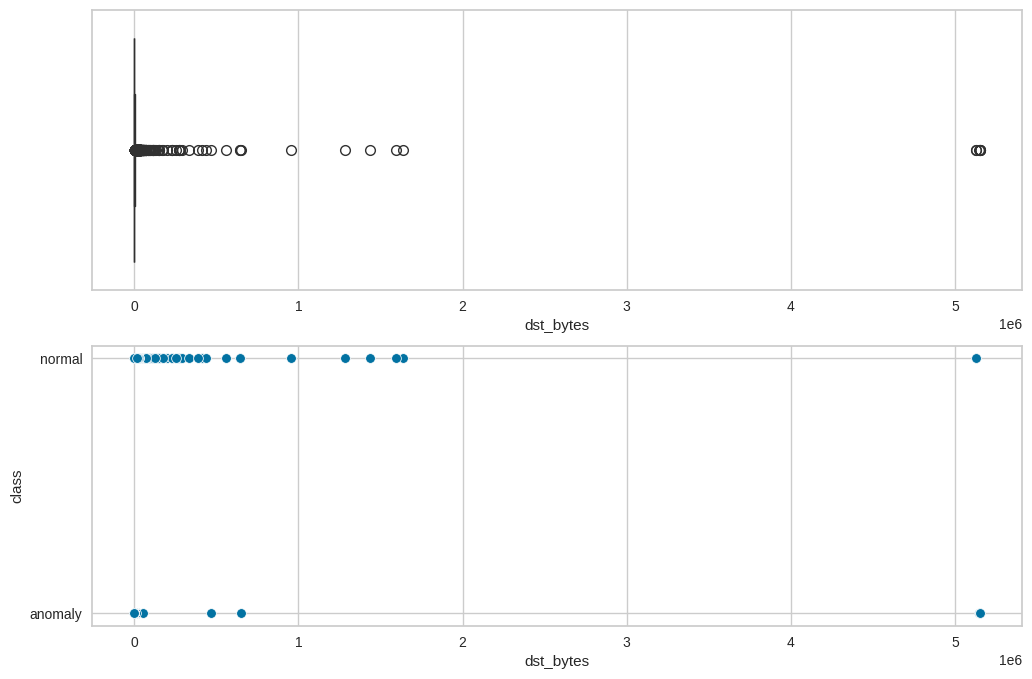

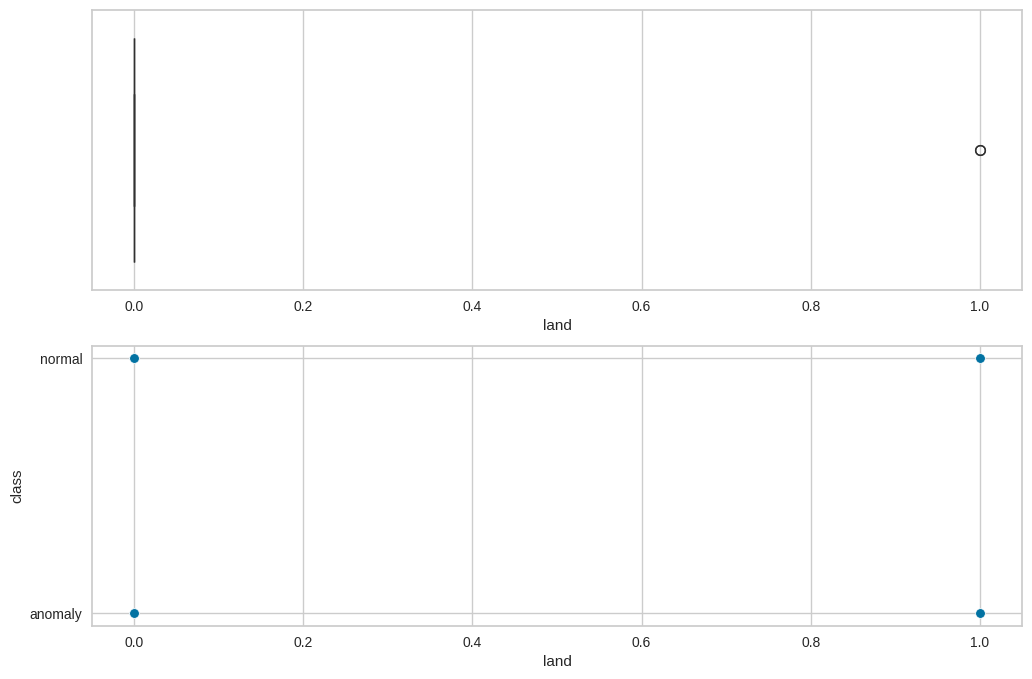

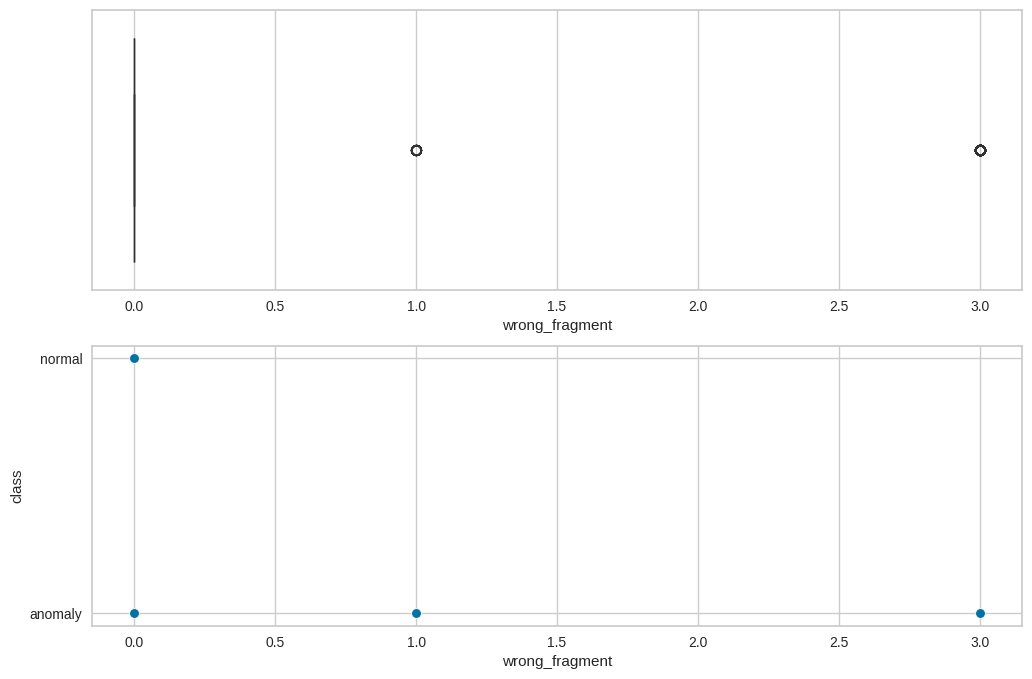

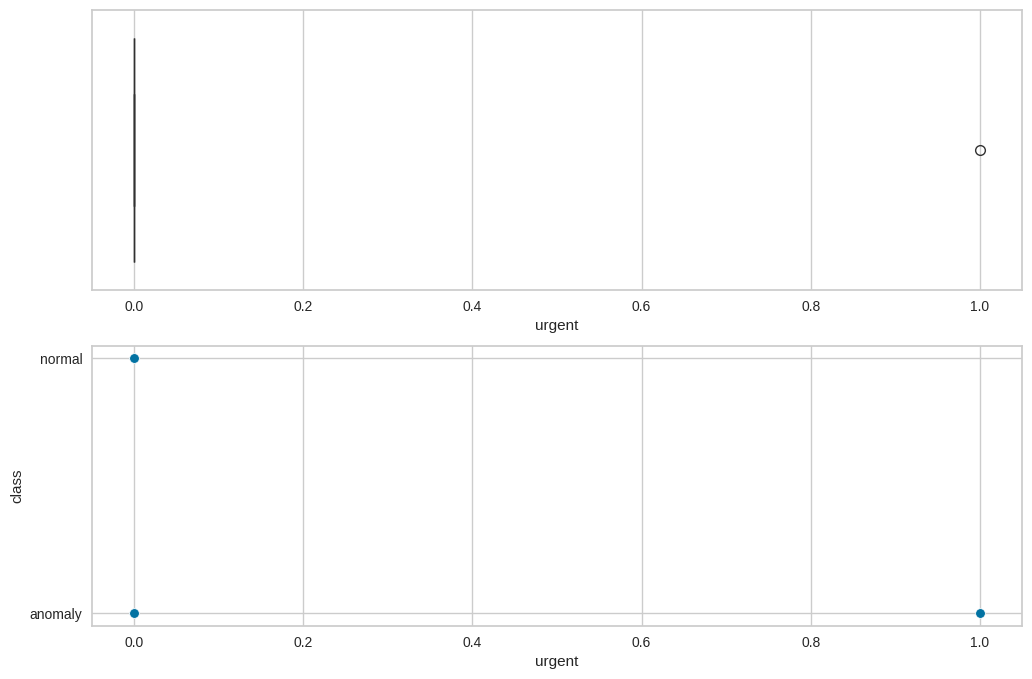

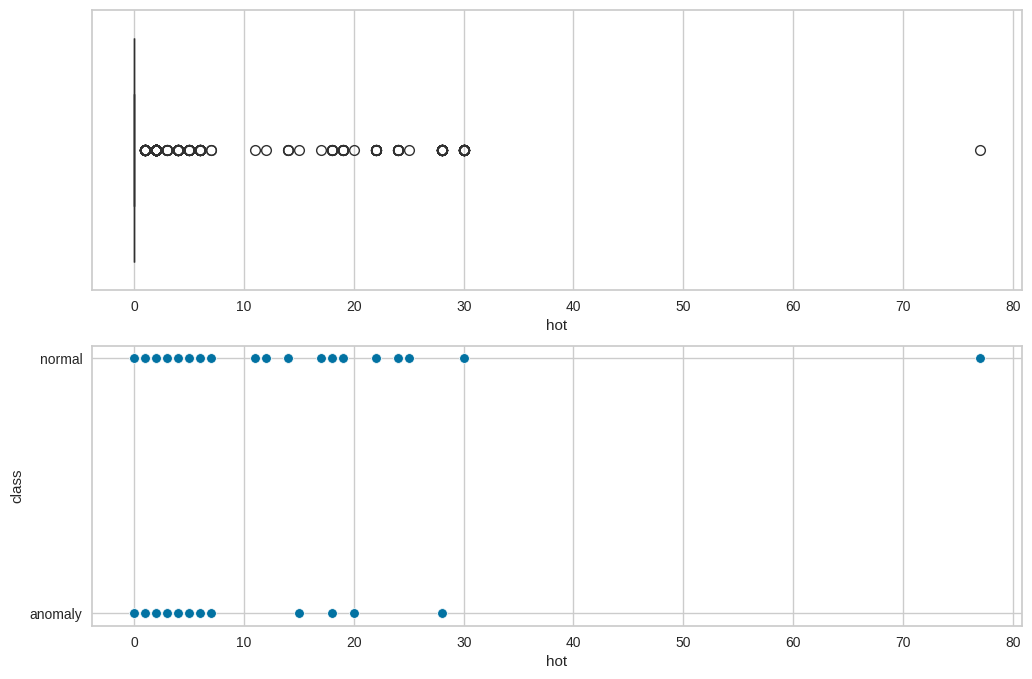

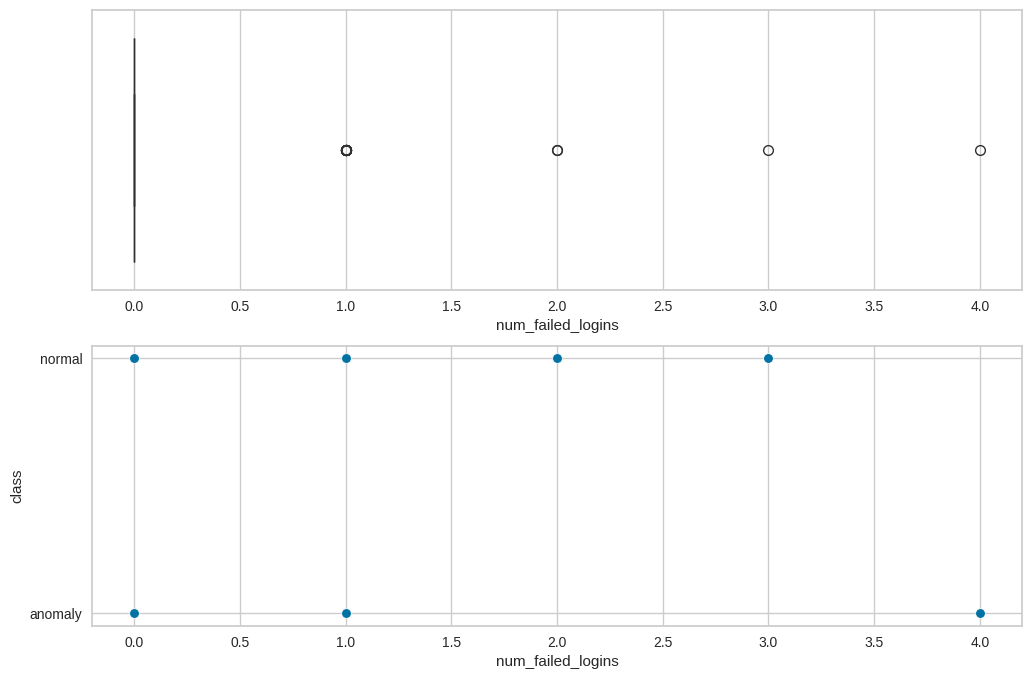

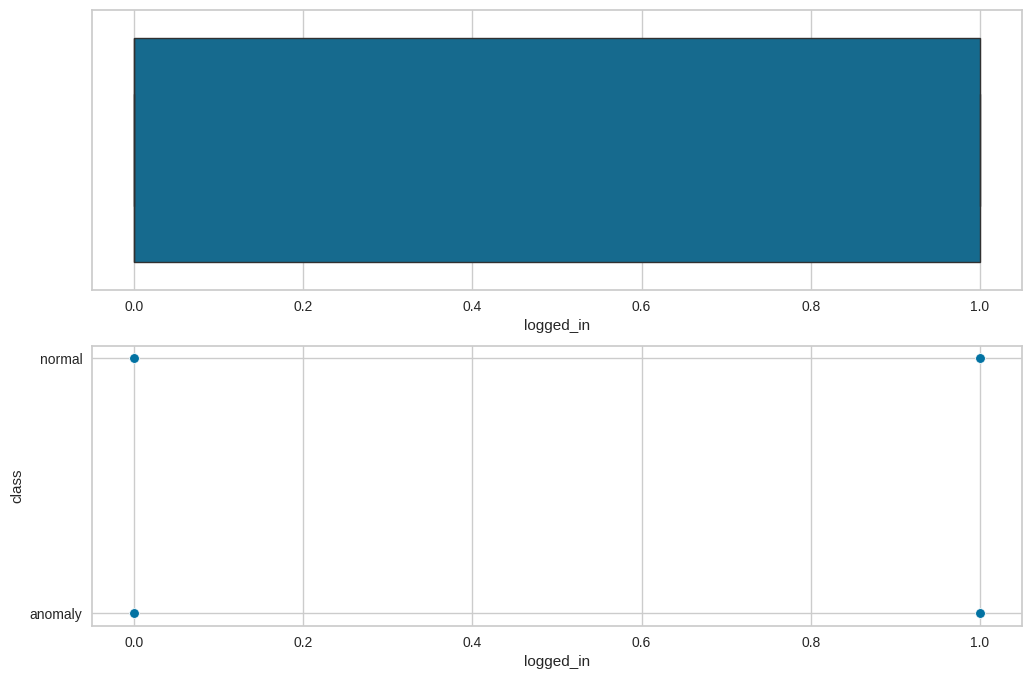

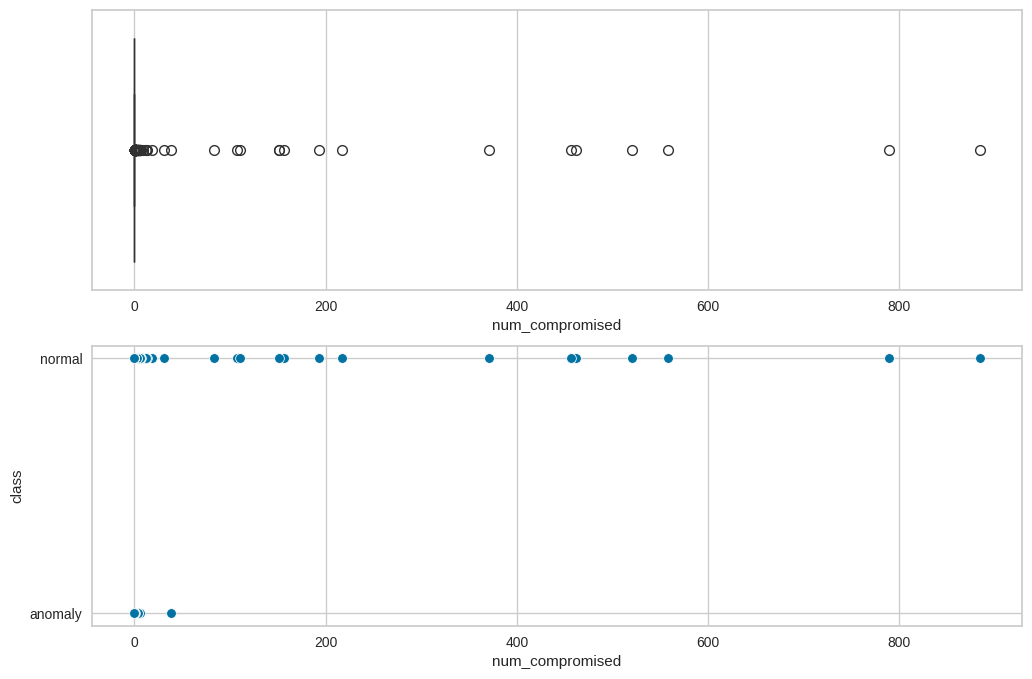

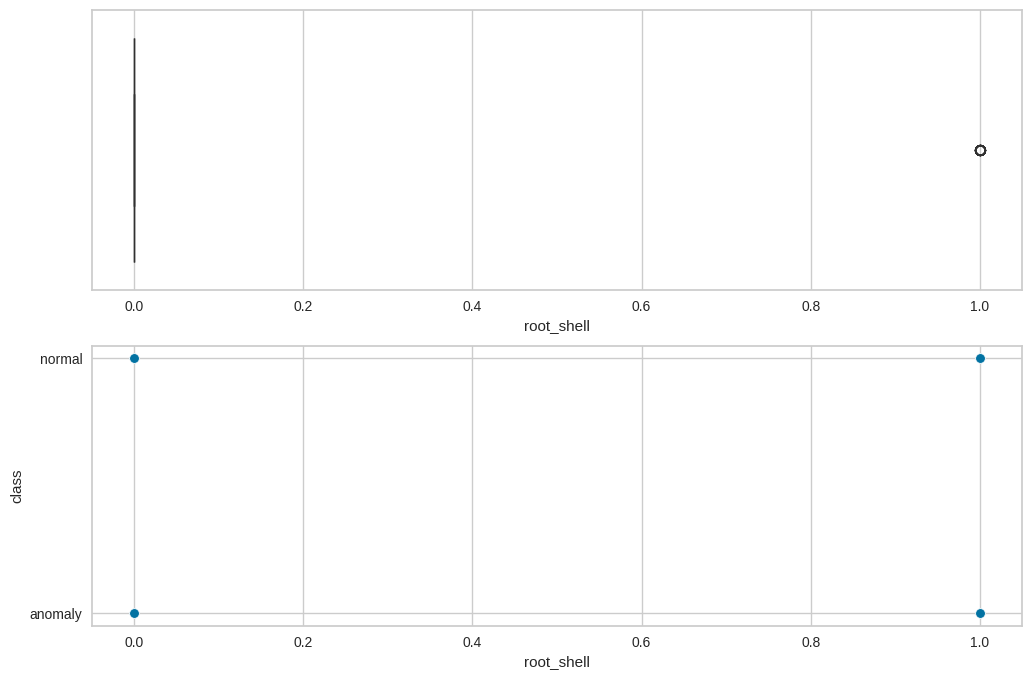

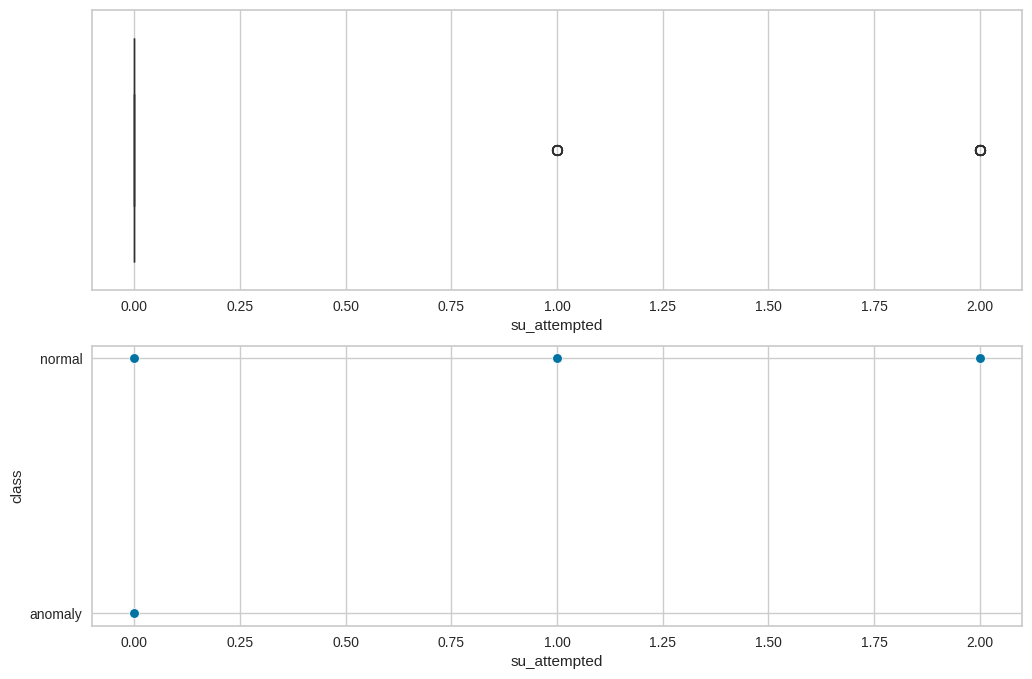

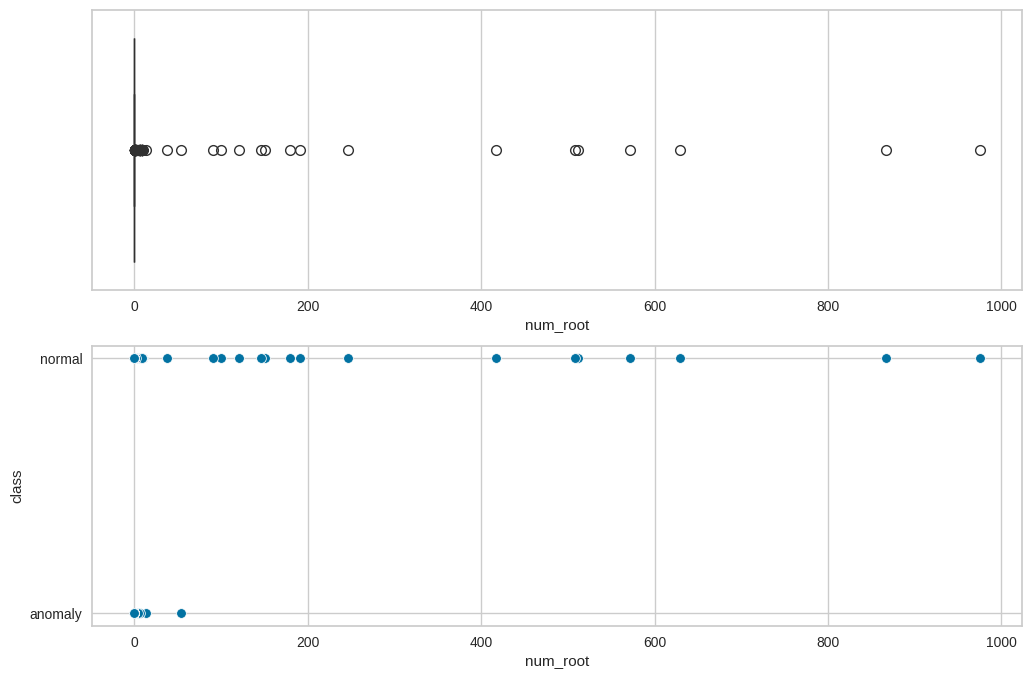

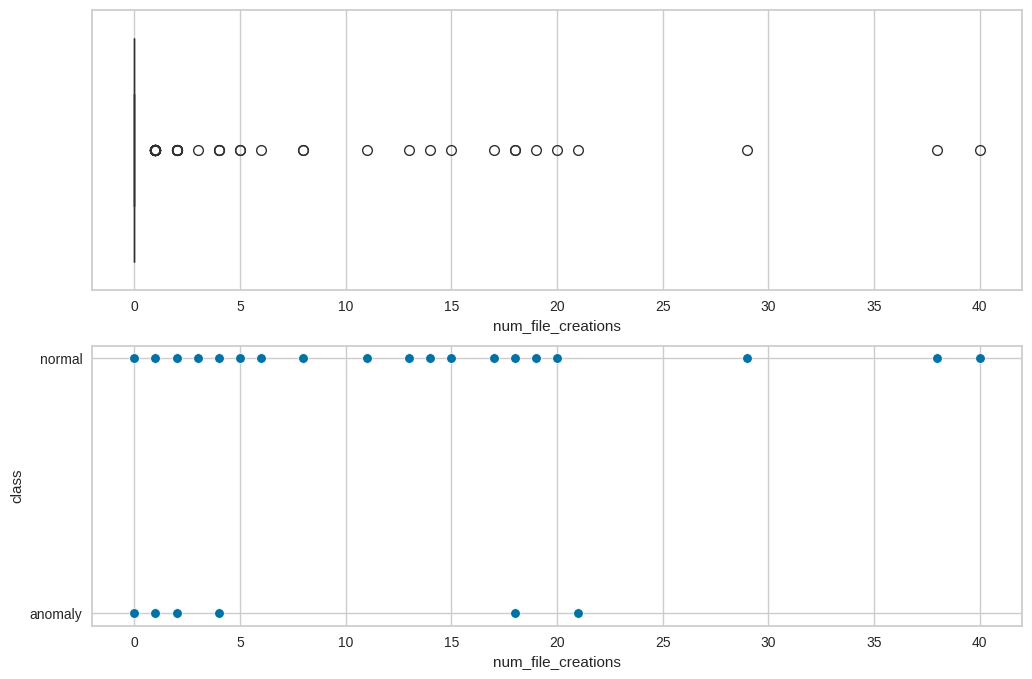

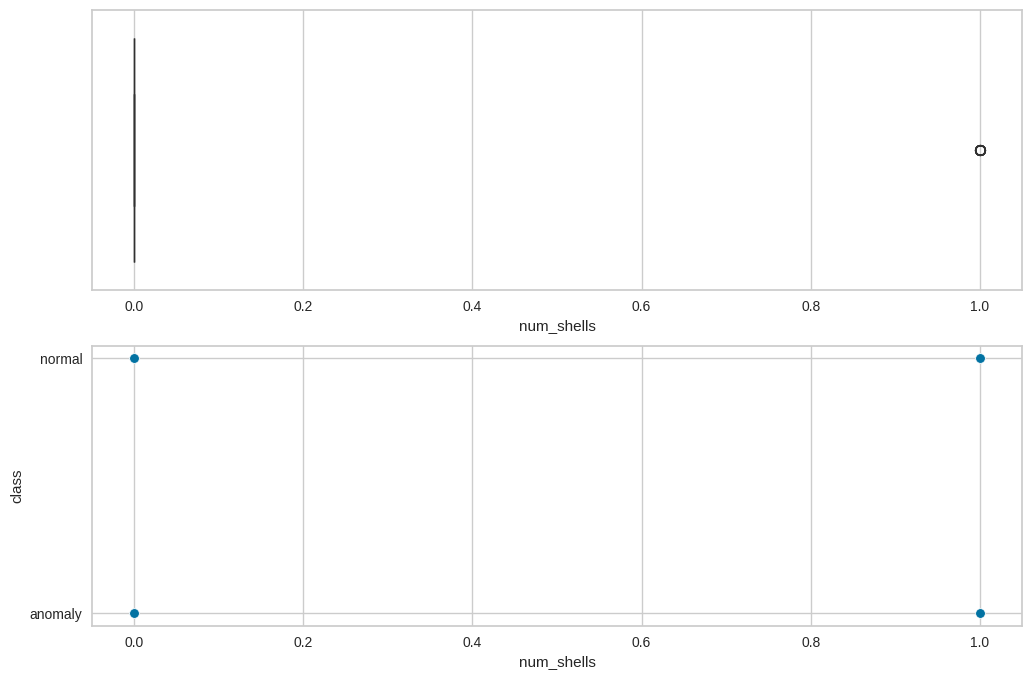

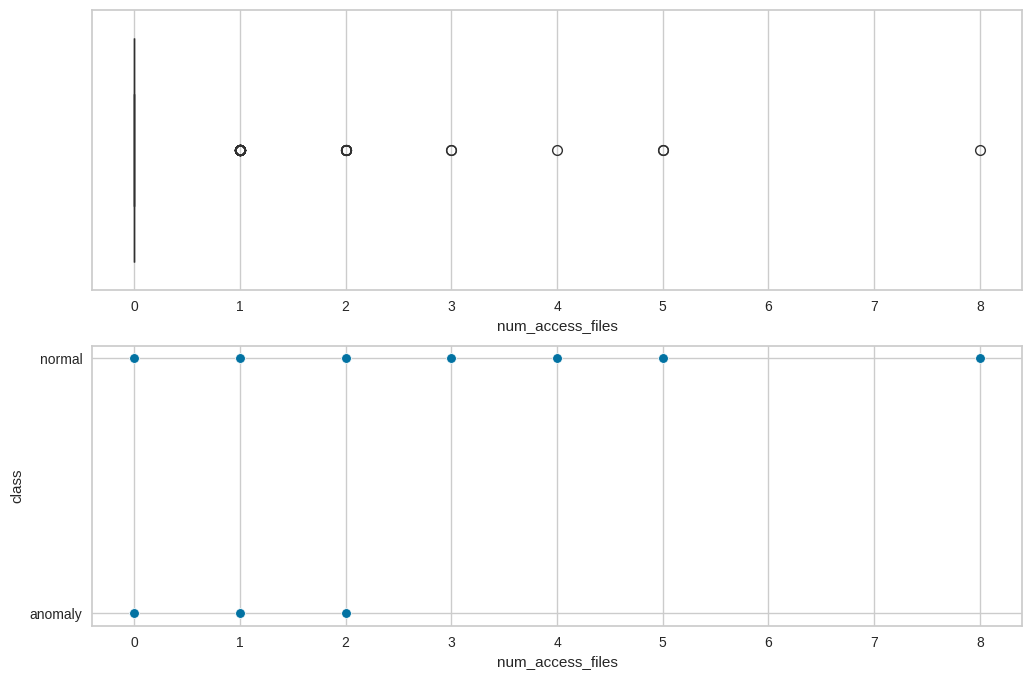

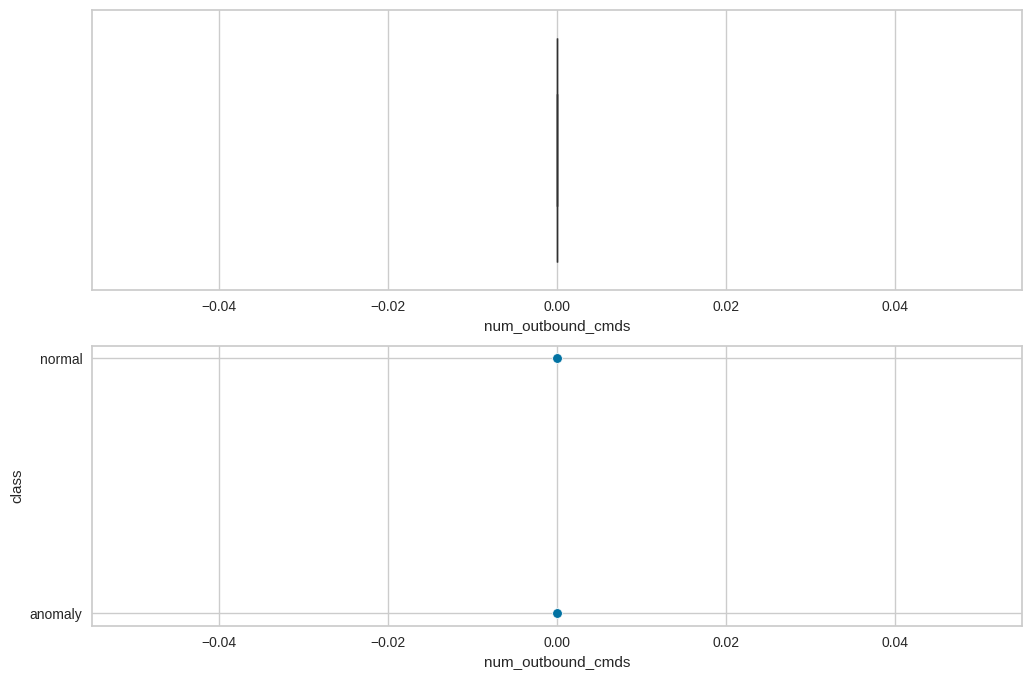

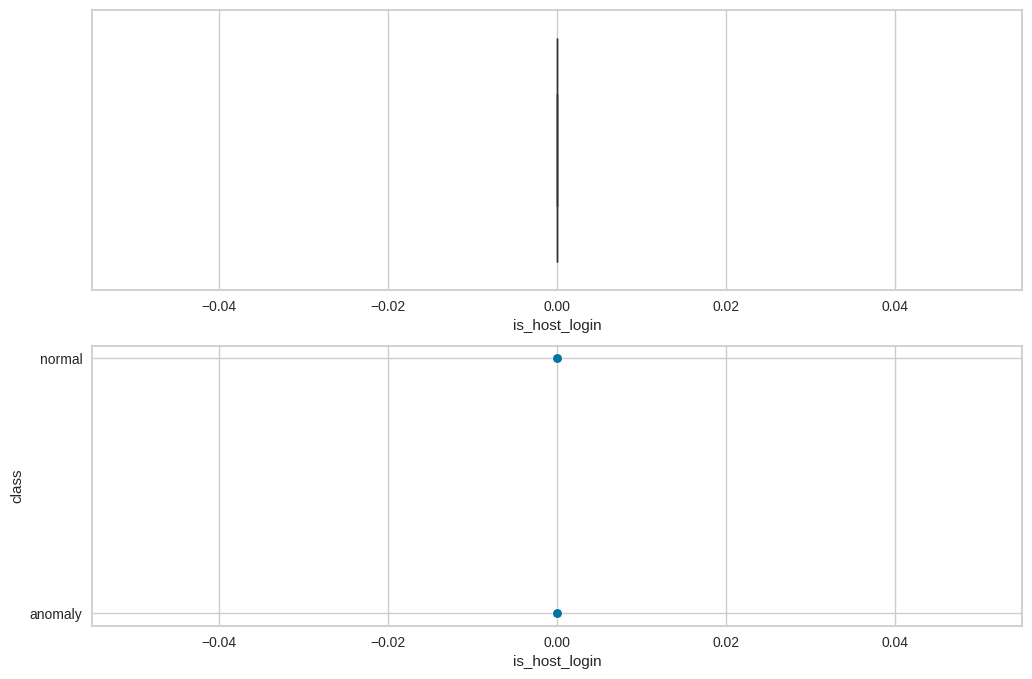

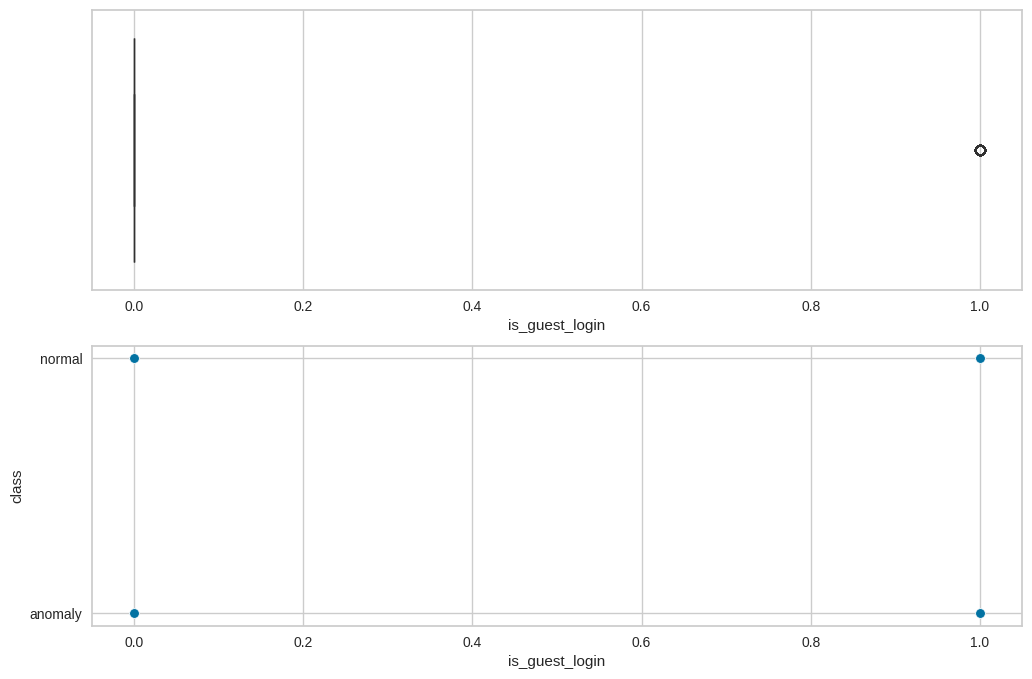

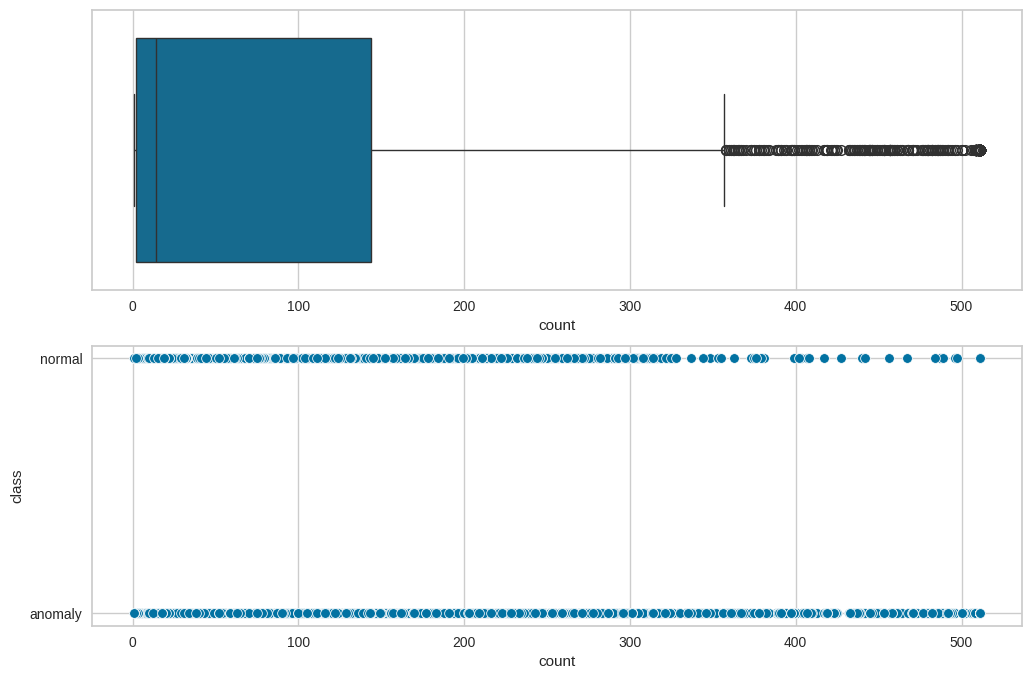

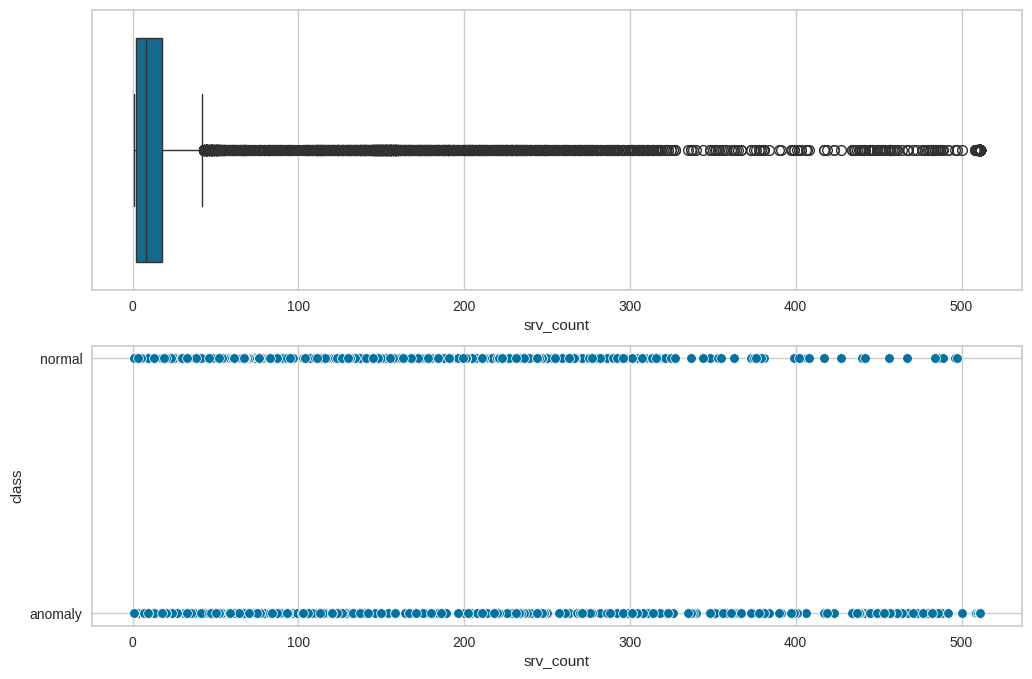

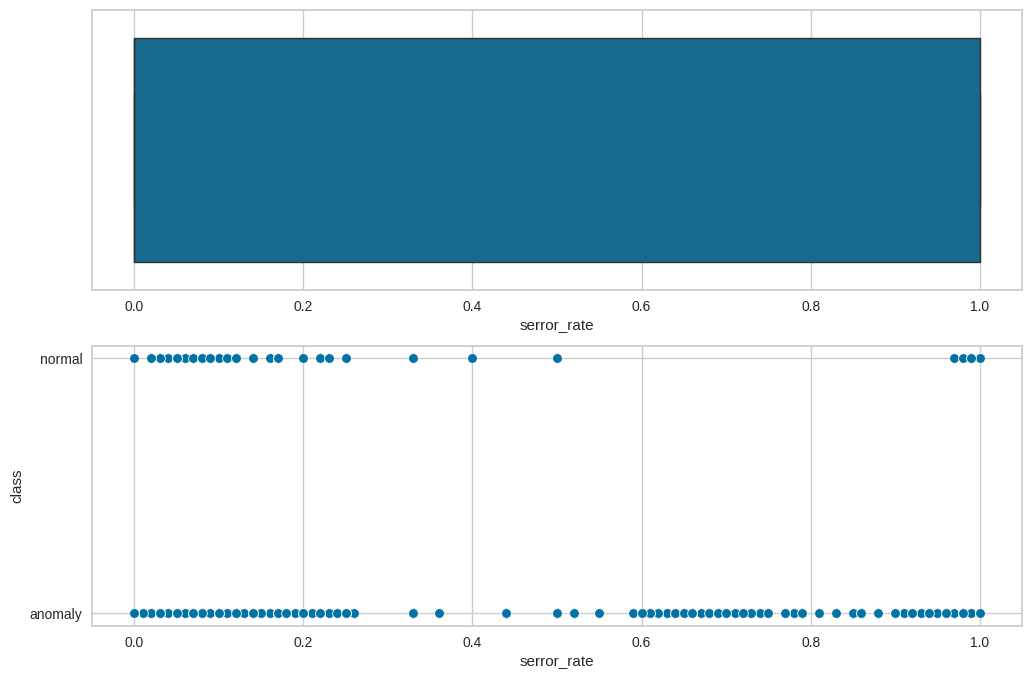

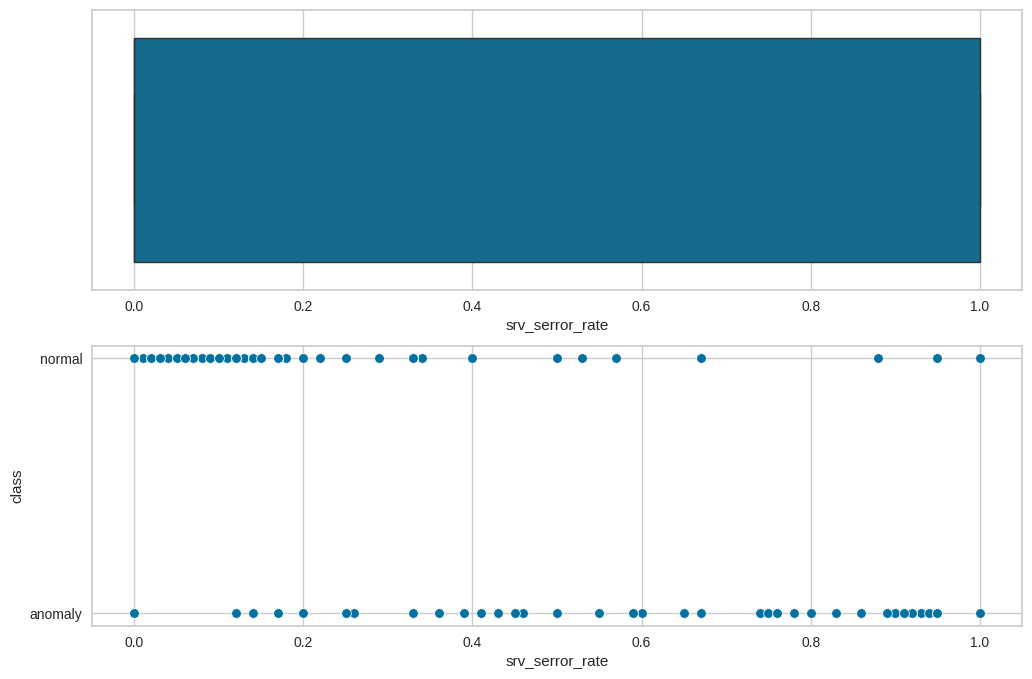

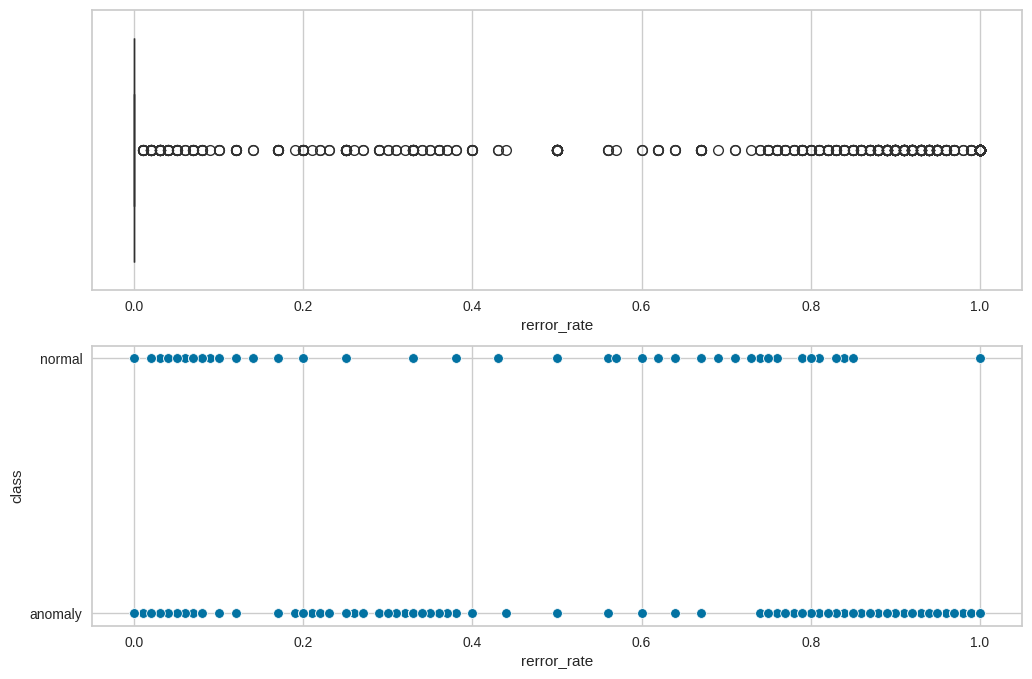

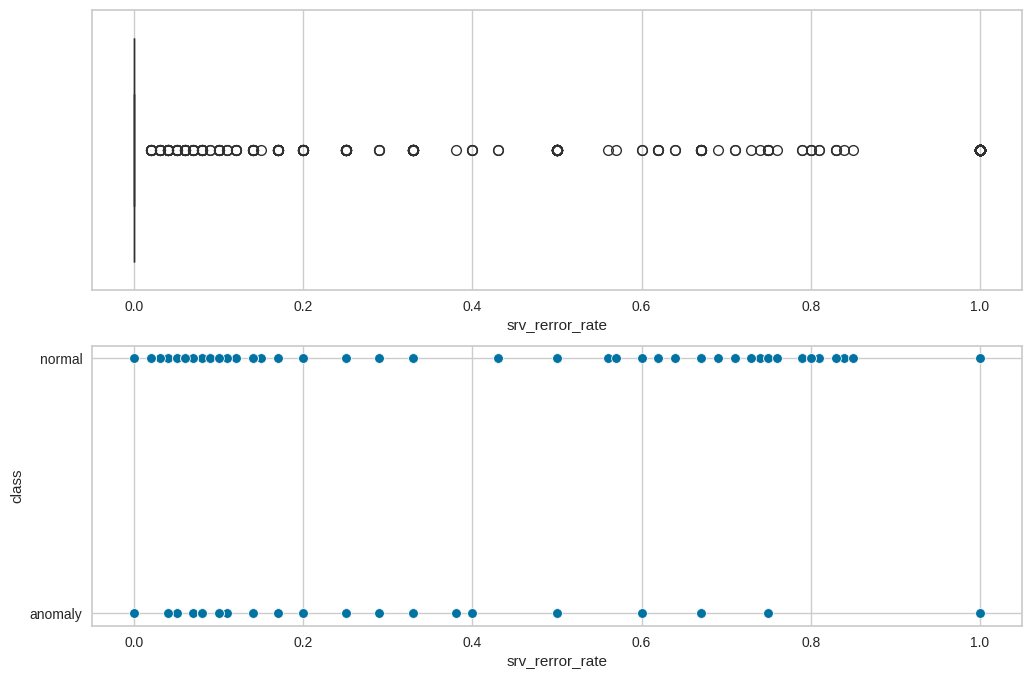

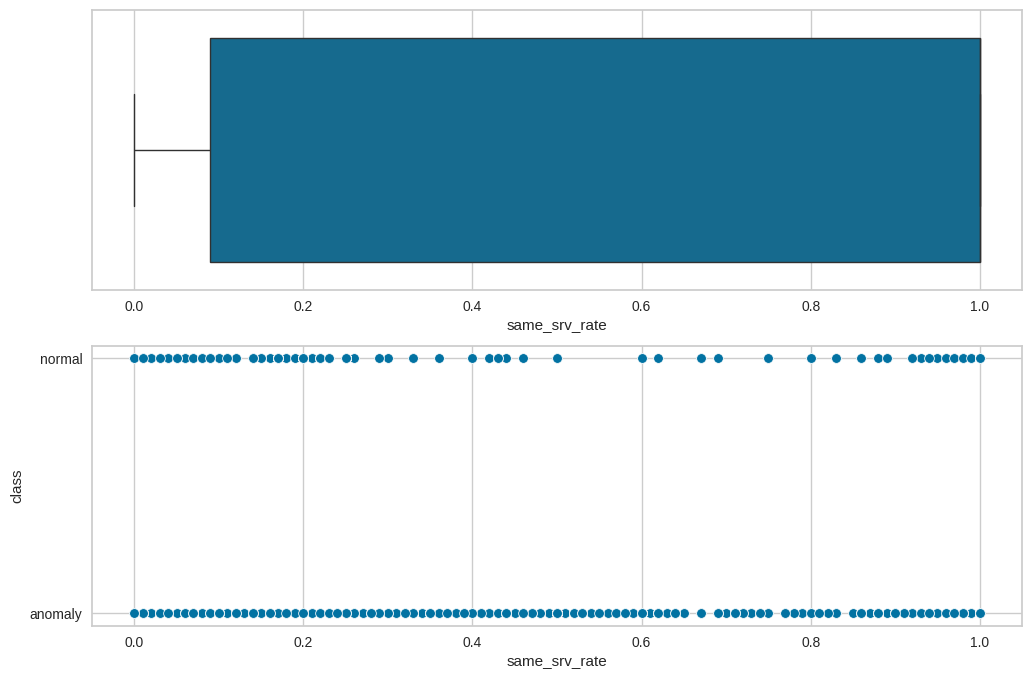

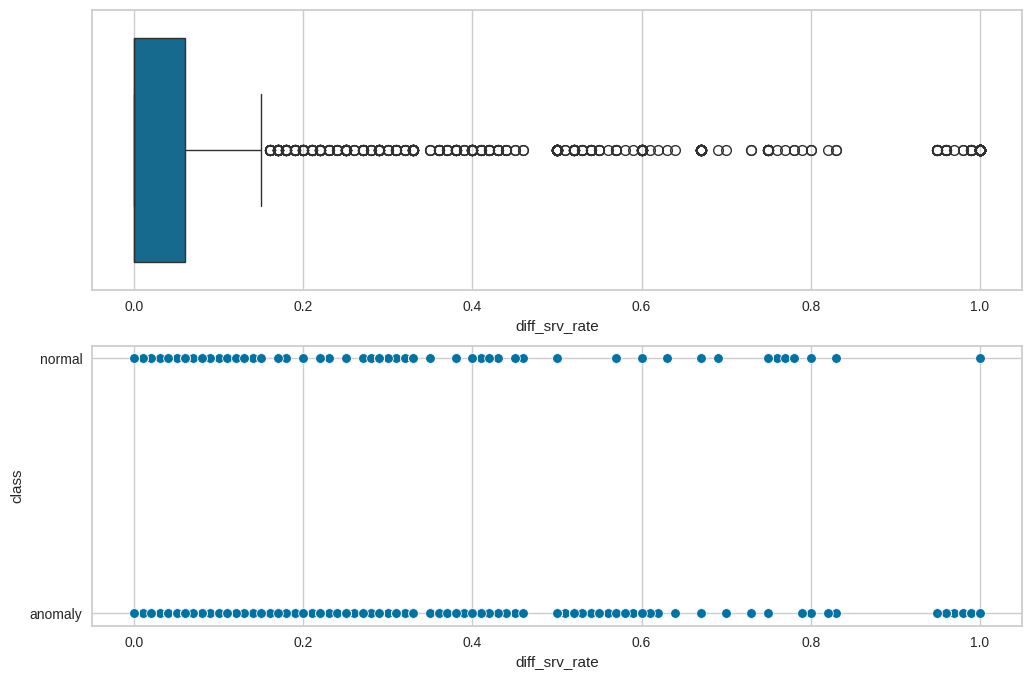

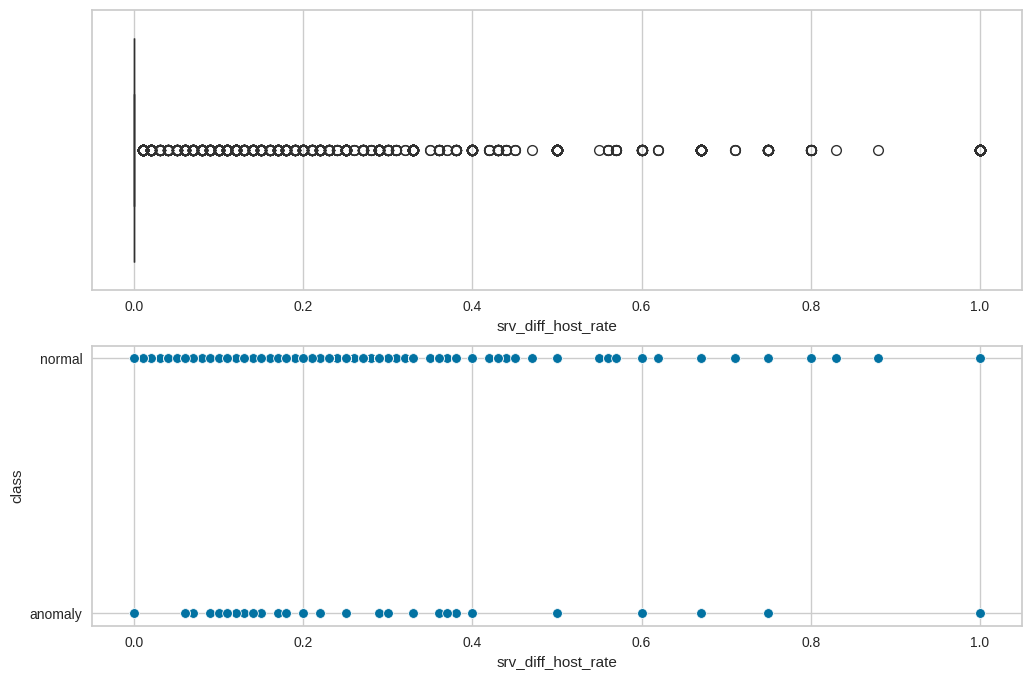

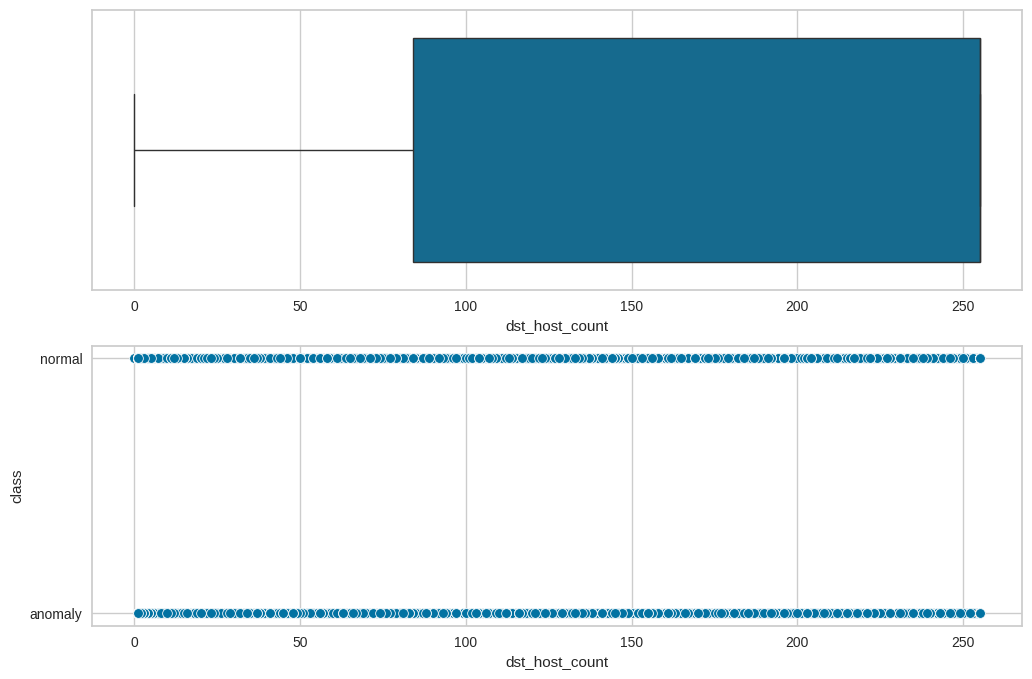

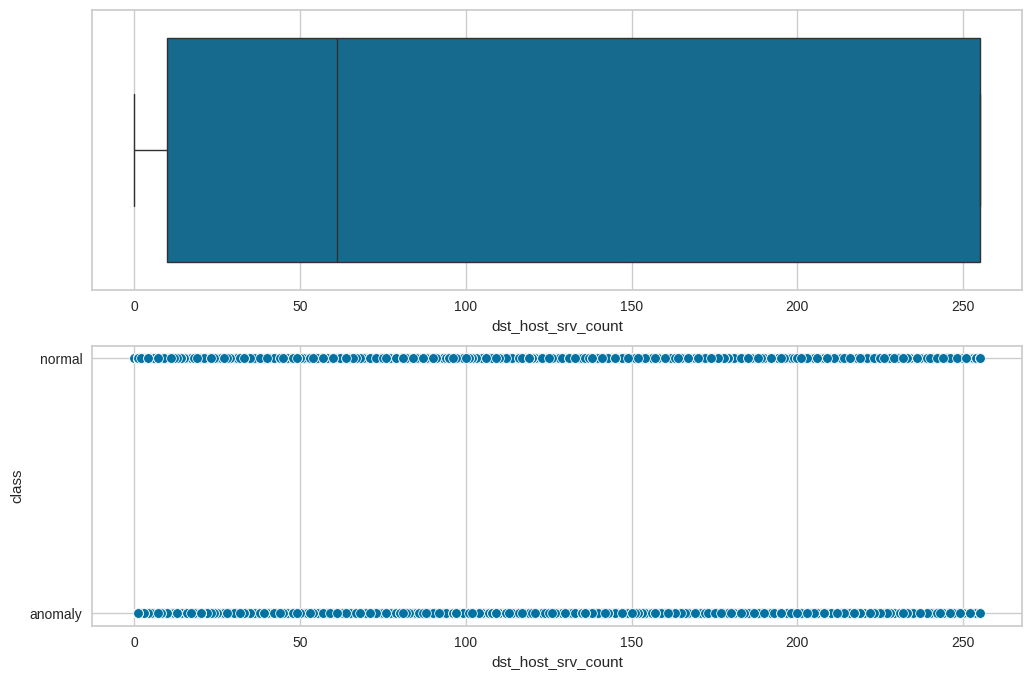

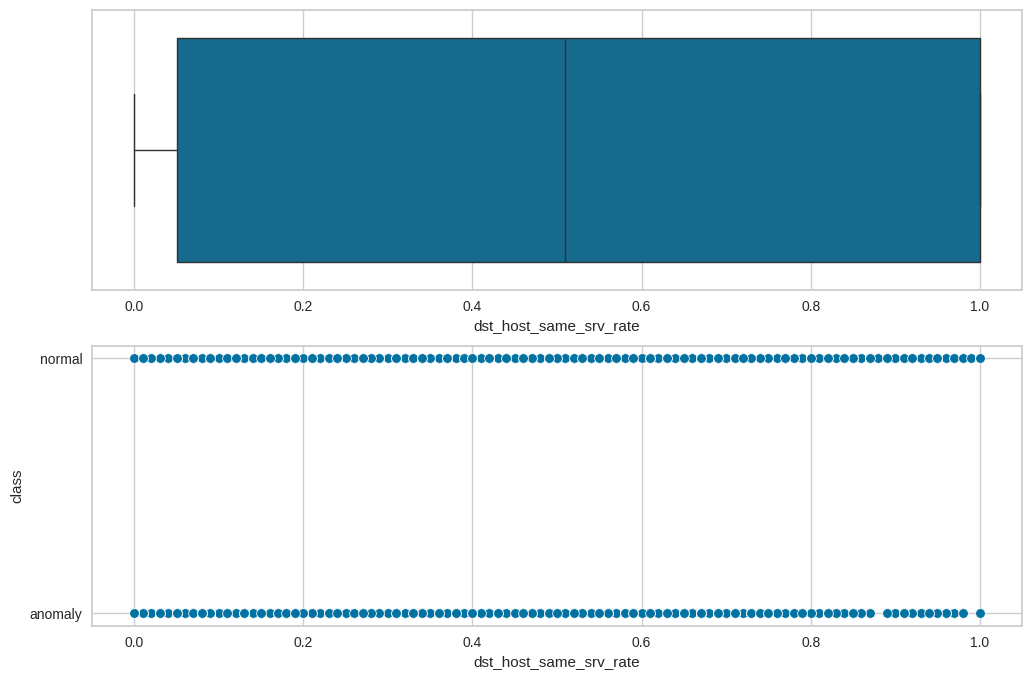

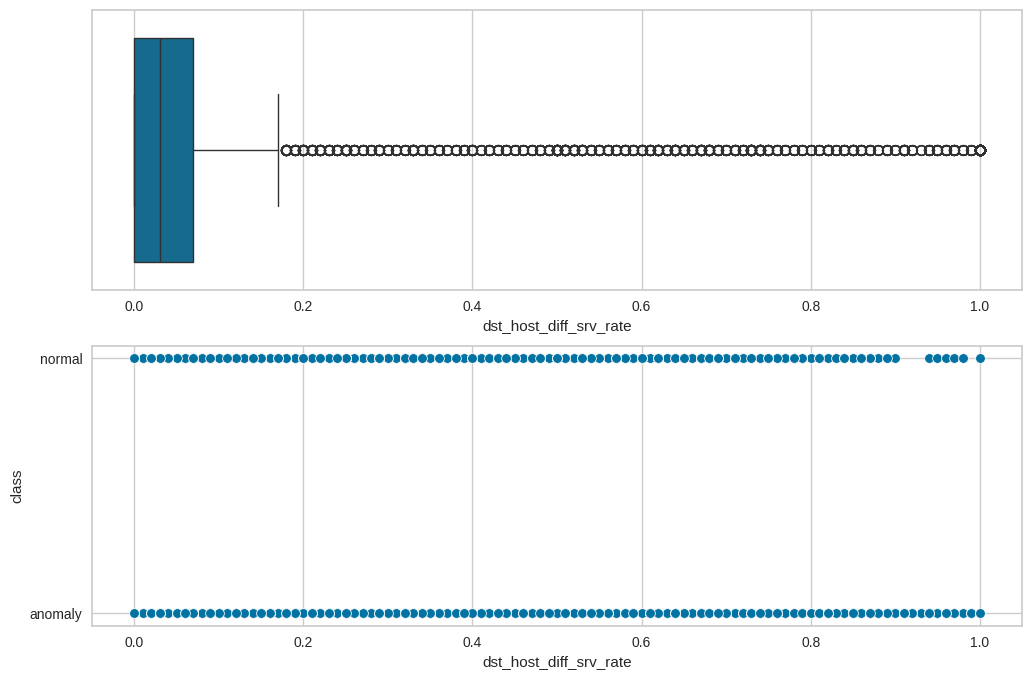

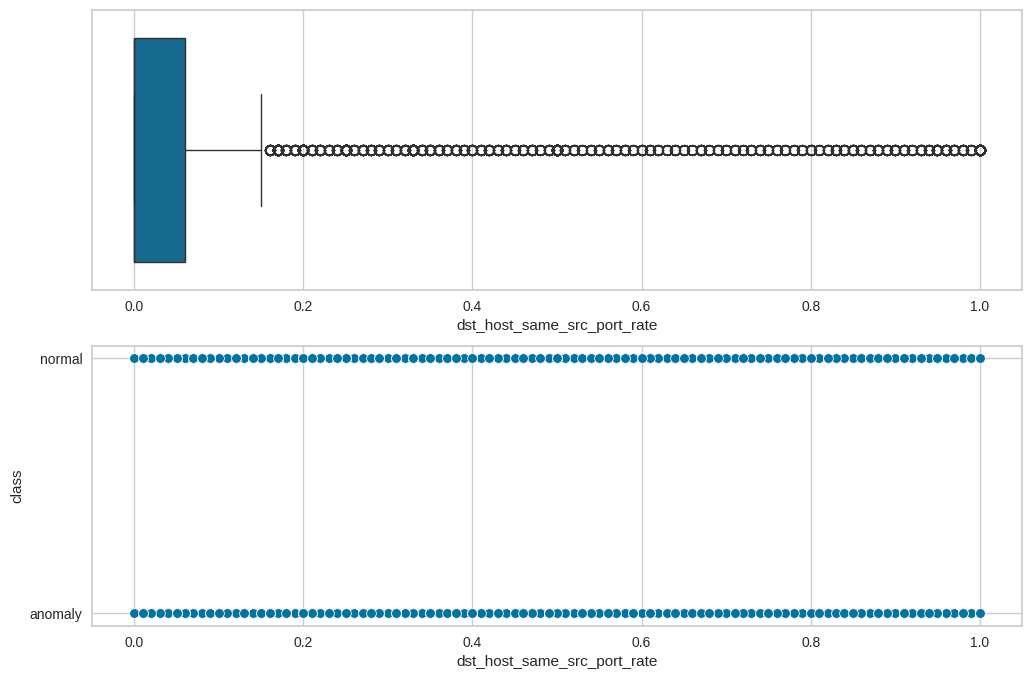

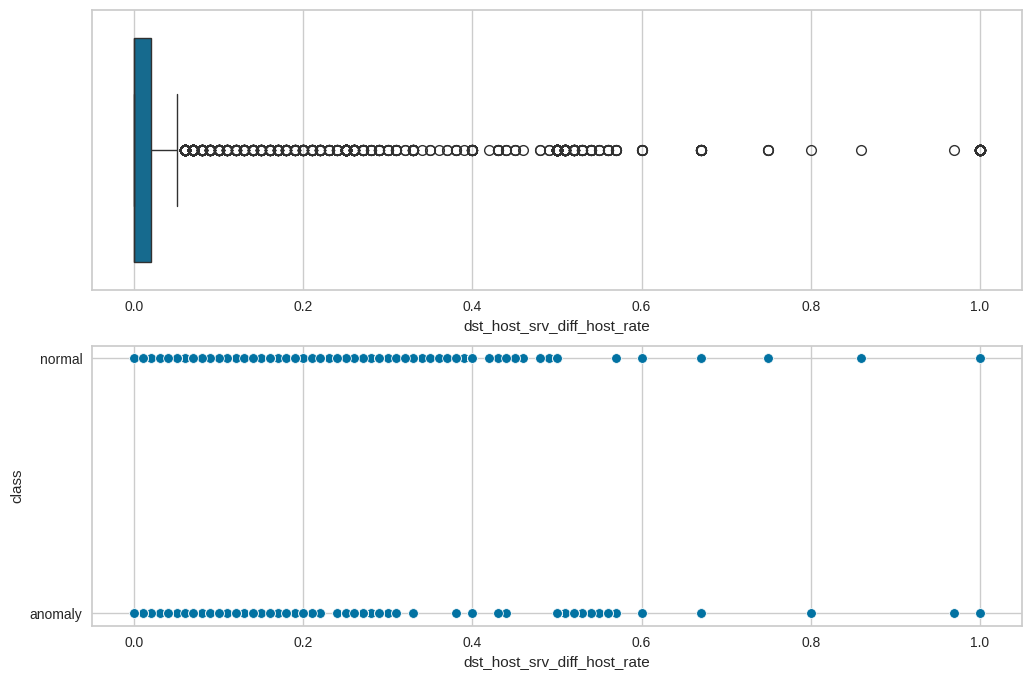

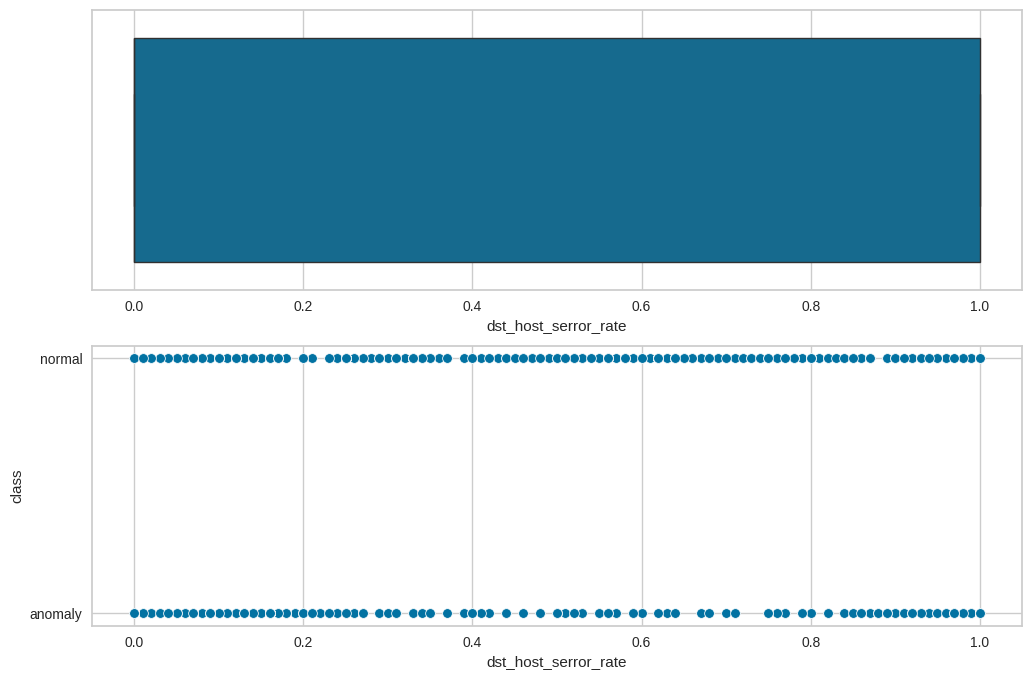

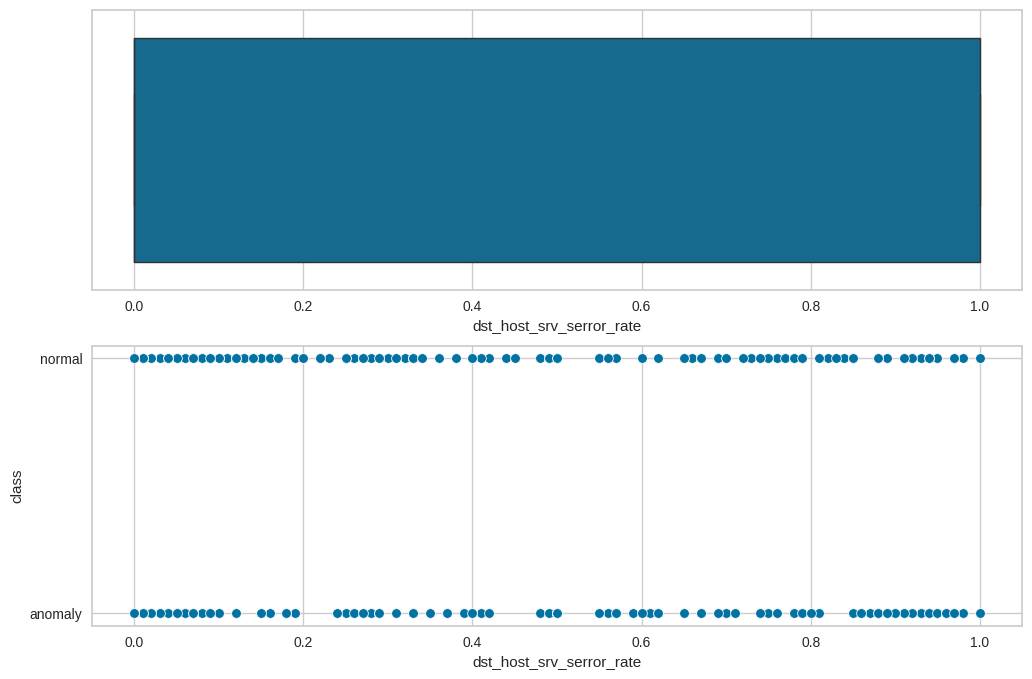

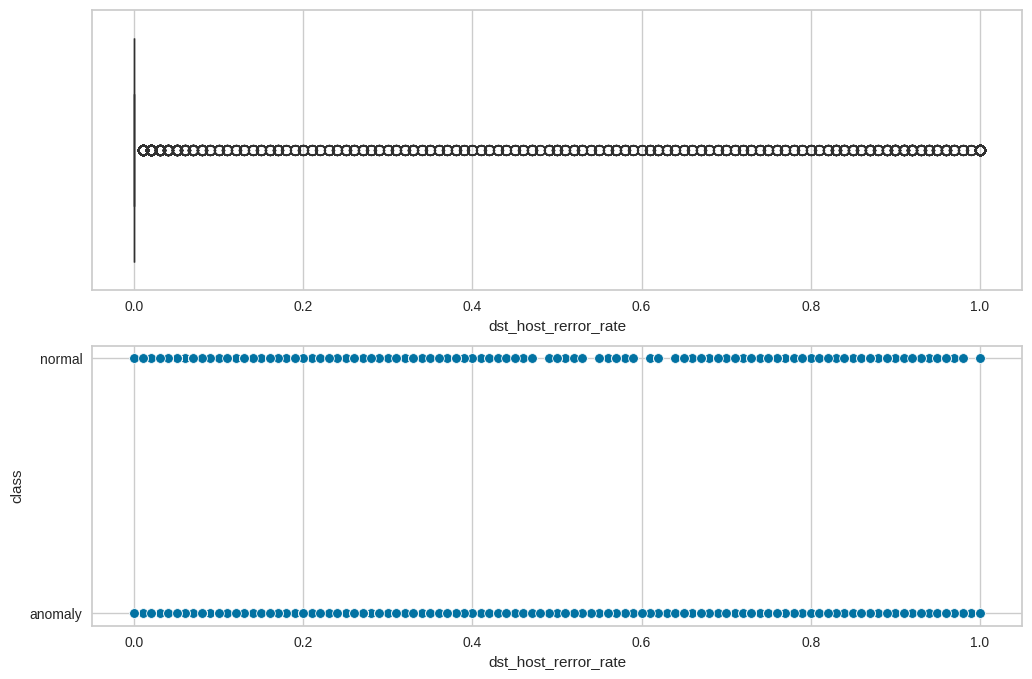

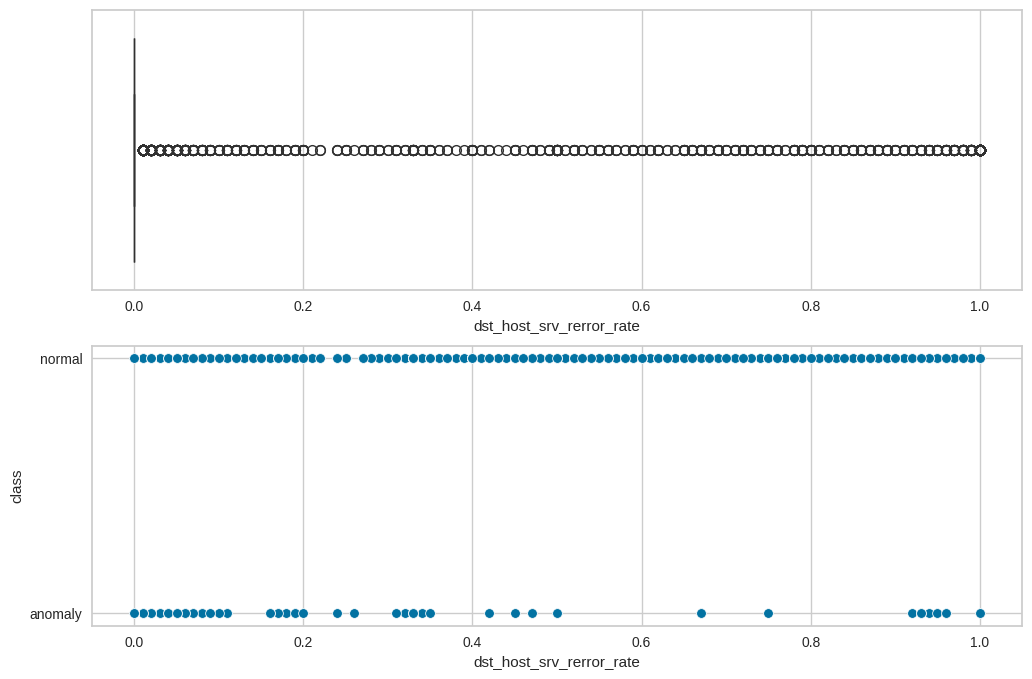

In [ ]:
for col in train:
    if col != 'class' and is_numeric_dtype(train[col]):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        g1 = sns.boxplot(x = train[col], ax=ax[0])
        g2 = sns.scatterplot(data=train, x=train[col],y=train['class'], ax=ax[1])
        plt.show()

<Axes: >

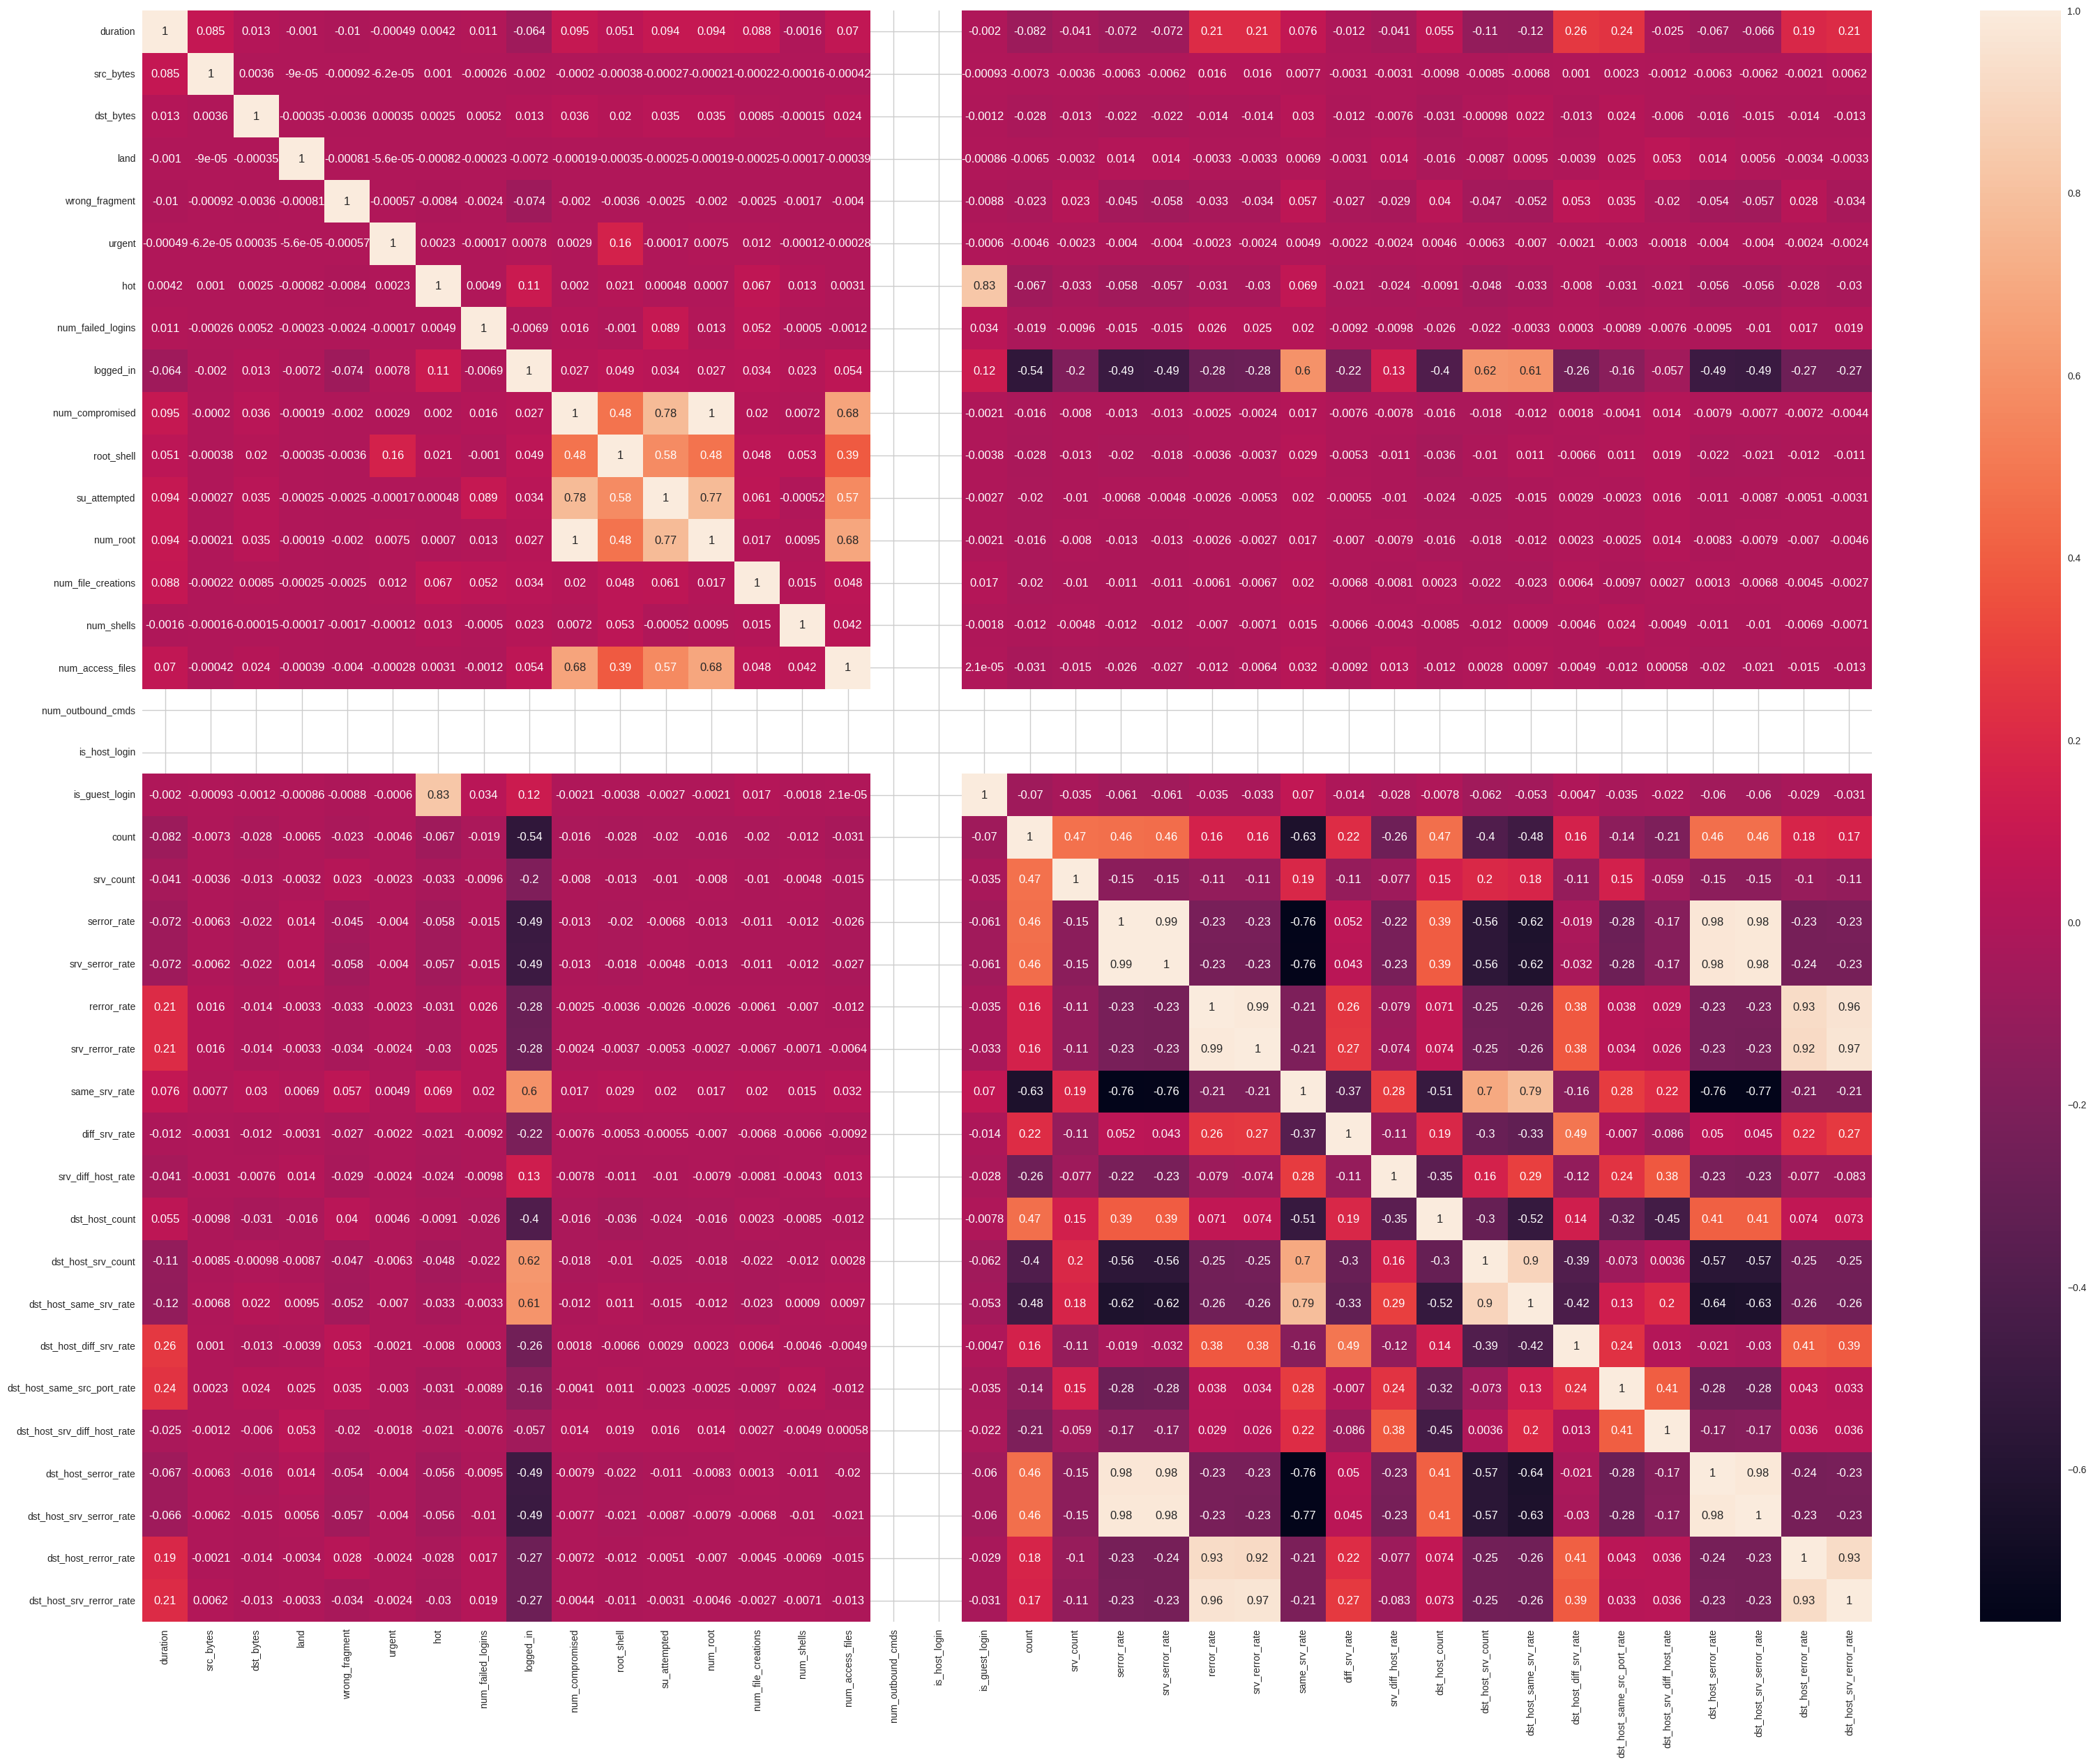

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(train.select_dtypes(include=['number']).corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

<Axes: xlabel='class', ylabel='count'>

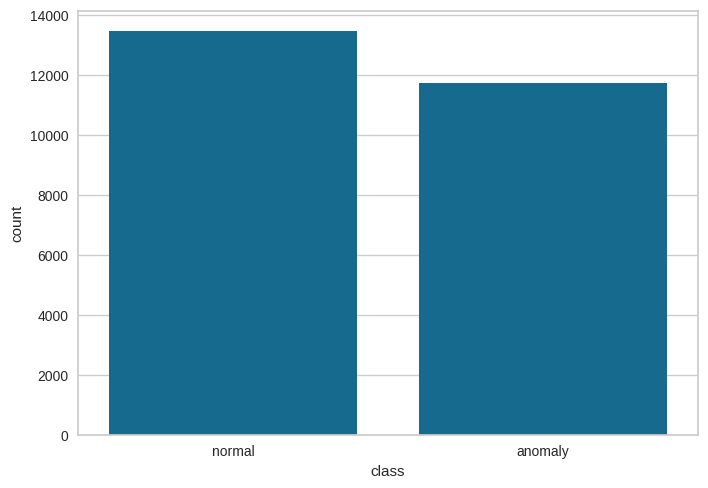

In [ ]:
sns.countplot(x=train['class'])


In [ ]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [ ]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [ ]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [ ]:
X_train = X_train[selected_features]


In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9790949986768986], datetime_start=datetime.datetime(2024, 6, 15, 5, 55, 33, 596085), datetime_complete=datetime.datetime(2024, 6, 15, 5, 55, 34, 802271), params={'KNN_n_neighbors': 16}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, mean_squared_error

# Assuming study_KNN.best_trial.params['KNN_n_neighbors'] is already defined
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

# Predicting for both train and test sets
y_train_pred = KNN_model.predict(x_train)
y_test_pred = KNN_model.predict(x_test)

# Calculate accuracy
KNN_train_score = KNN_model.score(x_train, y_train)
KNN_test_score = KNN_model.score(x_test, y_test)

# Print accuracy scores
print(f"Train Score: {KNN_train_score}")
print(f"Test Score: {KNN_test_score}")

# Calculate and print F1 score
KNN_f1_train = f1_score(y_train, y_train_pred)
KNN_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {KNN_f1_train}")
print(f"F1 Score (Test): {KNN_f1_test}")

# Calculate and print recall score
KNN_recall_train = recall_score(y_train, y_train_pred)
KNN_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {KNN_recall_train}")
print(f"Recall Score (Test): {KNN_recall_test}")

# Calculate and print mean squared error
KNN_mse_train = mean_squared_error(y_train, y_train_pred)
KNN_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {KNN_mse_train}")
print(f"Mean Squared Error (Test): {KNN_mse_test}")


Train Score: 0.9798684359759555
Test Score: 0.9790949986768986
F1 Score (Train): 0.9810393633498905
F1 Score (Test): 0.980532281912272
Recall Score (Train): 0.9781659388646288
Recall Score (Test): 0.9800492610837438
Mean Squared Error (Train): 0.02013156402404446
Mean Squared Error (Test): 0.02090500132310135


In [ ]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, mean_squared_error


# Predicting for both train and test sets
y_train_pred = lg_model.predict(x_train)
y_test_pred = lg_model.predict(x_test)

# Calculate accuracy
lg_train_score = lg_model.score(x_train, y_train)
lg_test_score = lg_model.score(x_test, y_test)

# Print accuracy scores
print(f"Training Score: {lg_train_score}")
print(f"Test Score: {lg_test_score}")

# Calculate and print F1 score
lg_f1_train = f1_score(y_train, y_train_pred)
lg_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {lg_f1_train}")
print(f"F1 Score (Test): {lg_f1_test}")

# Calculate and print recall score
lg_recall_train = recall_score(y_train, y_train_pred)
lg_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {lg_recall_train}")
print(f"Recall Score (Test): {lg_recall_test}")

# Calculate and print mean squared error
lg_mse_train = mean_squared_error(y_train, y_train_pred)
lg_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {lg_mse_train}")
print(f"Mean Squared Error (Test): {lg_mse_test}")


Training Score: 0.9288873766587274
Test Score: 0.9233924318602805
F1 Score (Train): 0.9348232848232848
F1 Score (Test): 0.930064017393405
Recall Score (Train): 0.9578229843433805
Recall Score (Test): 0.9482758620689655
Mean Squared Error (Train): 0.07111262334127254
Mean Squared Error (Test): 0.0766075681397195


In [ ]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=21, state=TrialState.COMPLETE, values=[0.9952368351415718], datetime_start=datetime.datetime(2024, 6, 15, 5, 55, 44, 936754), datetime_complete=datetime.datetime(2024, 6, 15, 5, 55, 45, 2422), params={'dt_max_depth': 18, 'dt_max_features': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=21, value=None)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, mean_squared_error

dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train_score, dt_test_score = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train_score}")
print(f"Test Score: {dt_test_score}")

dt_f1_train = f1_score(y_train, y_train_pred)
dt_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {dt_f1_train}")
print(f"F1 Score (Test): {dt_f1_test}")

# Calculate and print recall score
dt_recall_train = recall_score(y_train, y_train_pred)
dt_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {dt_recall_train}")
print(f"Recall Score (Test): {dt_recall_test}")

# Calculate and print mean squared error
dt_mse_train = mean_squared_error(y_train, y_train_pred)
dt_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {dt_mse_train}")
print(f"Mean Squared Error (Test): {dt_mse_test}")

Train Score: 1.0
Test Score: 0.9944429743318338
F1 Score (Train): 0.9348232848232848
F1 Score (Test): 0.930064017393405
Recall Score (Train): 0.9578229843433805
Recall Score (Test): 0.9482758620689655
Mean Squared Error (Train): 0.07111262334127254
Mean Squared Error (Test): 0.0766075681397195


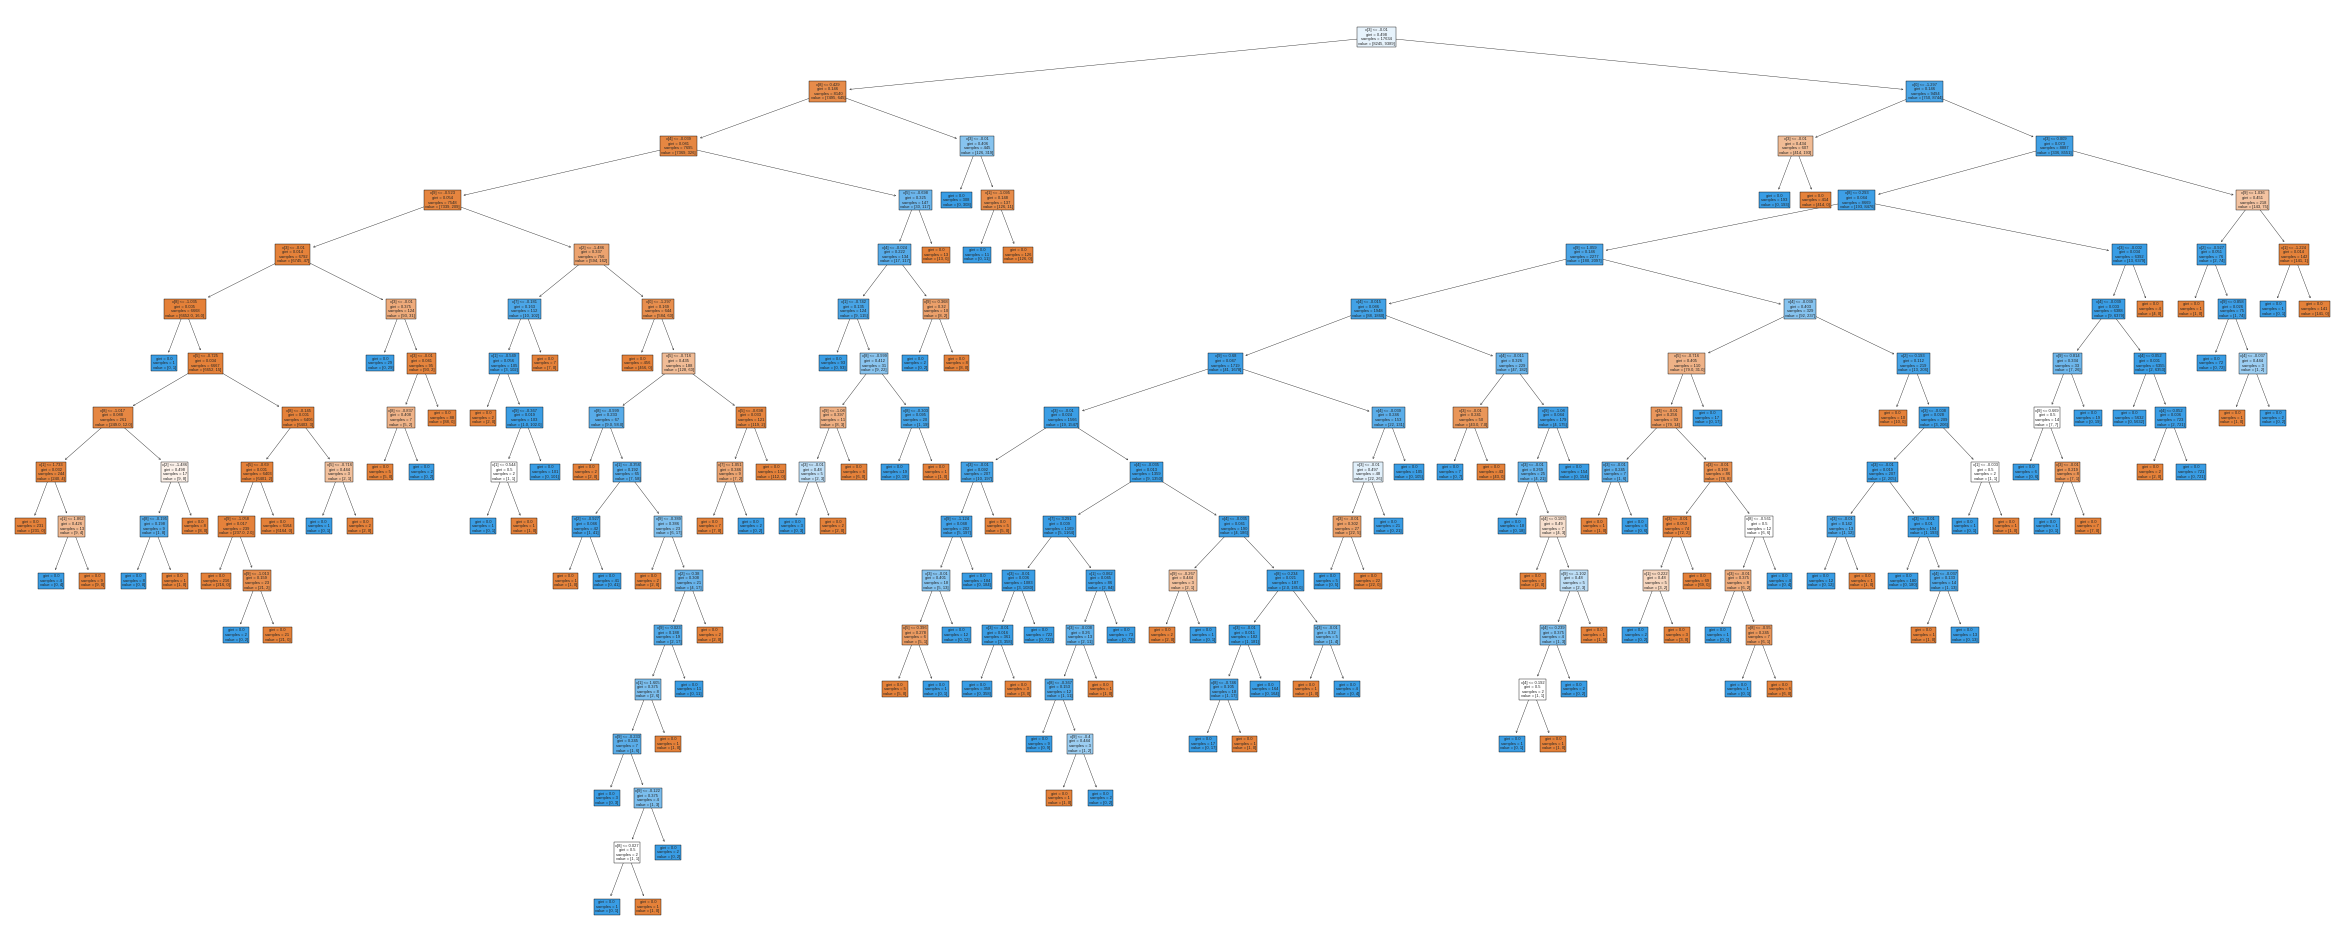

In [ ]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

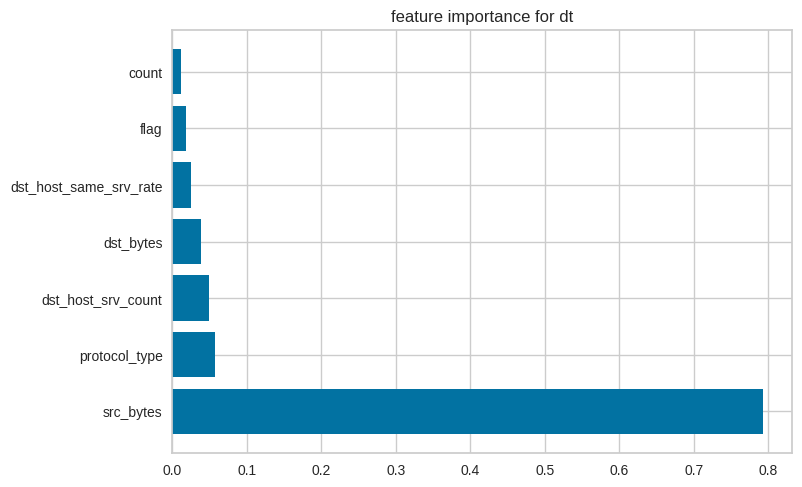

In [ ]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function
# if you are interested in negative contribution of features
f_importance(abs(dt.feature_importances_), features_names, top=7)


In [ ]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[0.9965599364911352], datetime_start=datetime.datetime(2024, 6, 15, 5, 55, 59, 933450), datetime_complete=datetime.datetime(2024, 6, 15, 5, 56, 0, 183838), params={'rf_max_depth': 32, 'rf_max_features': 4, 'rf_n_estimators': 13}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=11, value=None)


In [ ]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=32, max_features=4, n_estimators=13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, mean_squared_error

# Predicting for both train and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Calculate accuracy
rf_train_score = rf.score(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)

# Print accuracy scores
print(f"Train Score: {rf_train_score}")
print(f"Test Score: {rf_test_score}")

# Calculate and print F1 score
rf_f1_train = f1_score(y_train, y_train_pred)
rf_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {rf_f1_train}")
print(f"F1 Score (Test): {rf_f1_test}")

# Calculate and print recall score
rf_recall_train = recall_score(y_train, y_train_pred)
rf_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {rf_recall_train}")
print(f"Recall Score (Test): {rf_recall_test}")

# Calculate and print mean squared error
rf_mse_train = mean_squared_error(y_train, y_train_pred)
rf_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {rf_mse_train}")
print(f"Mean Squared Error (Test): {rf_mse_test}")


Train Score: 0.9997164568447318
Test Score: 0.9964276263561789
F1 Score (Train): 0.9997337451408488
F1 Score (Test): 0.9966752862947913
Recall Score (Train): 0.999786984769411
Recall Score (Test): 0.9967980295566502
Mean Squared Error (Train): 0.00028354315526823184
Mean Squared Error (Test): 0.003572373643821117


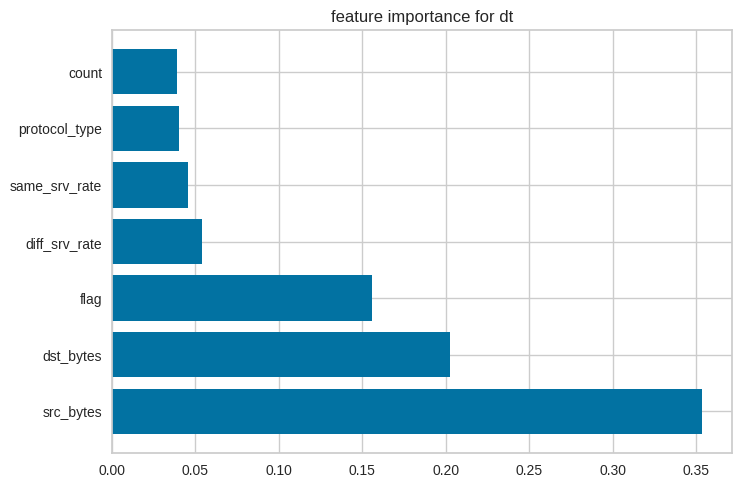

In [ ]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function
# if you are interested in negative contribution of features
f_importance(abs(rf.feature_importances_), features_names, top=7)

In [ ]:
SKGB = GradientBoostingClassifier(random_state=42)
SKGB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, mean_squared_error

# Predicting for both train and test sets
y_train_pred = SKGB.predict(x_train)
y_test_pred = SKGB.predict(x_test)

# Calculate accuracy
SKGB_train_score = SKGB.score(x_train, y_train)
SKGB_test_score = SKGB.score(x_test, y_test)

# Print accuracy scores
print(f"Training Score: {SKGB_train_score}")
print(f"Test Score: {SKGB_test_score}")

# Calculate and print F1 score
SKGB_f1_train = f1_score(y_train, y_train_pred)
SKGB_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {SKGB_f1_train}")
print(f"F1 Score (Test): {SKGB_f1_test}")

# Calculate and print recall score
SKGB_recall_train = recall_score(y_train, y_train_pred)
SKGB_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {SKGB_recall_train}")
print(f"Recall Score (Test): {SKGB_recall_test}")

# Calculate and print mean squared error
SKGB_mse_train = mean_squared_error(y_train, y_train_pred)
SKGB_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {SKGB_mse_train}")
print(f"Mean Squared Error (Test): {SKGB_mse_test}")


Training Score: 0.9947828059430646
Test Score: 0.9927229425774015
F1 Score (Train): 0.9951063829787234
F1 Score (Test): 0.9932224276032039
Recall Score (Train): 0.9962722334646927
Recall Score (Test): 0.9926108374384236
Mean Squared Error (Train): 0.0052171940569354655
Mean Squared Error (Test): 0.007277057422598571


In [ ]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, mean_squared_error



# Predicting for both train and test sets
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

# Calculate accuracy
xgb_train_score = xgb_model.score(x_train, y_train)
xgb_test_score = xgb_model.score(x_test, y_test)

# Print accuracy scores
print(f"Training Score: {xgb_train_score}")
print(f"Test Score: {xgb_test_score}")

# Calculate and print F1 score
xgb_f1_train = f1_score(y_train, y_train_pred)
xgb_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {xgb_f1_train}")
print(f"F1 Score (Test): {xgb_f1_test}")

# Calculate and print recall score
xgb_recall_train = recall_score(y_train, y_train_pred)
xgb_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {xgb_recall_train}")
print(f"Recall Score (Test): {xgb_recall_test}")

# Calculate and print mean squared error
xgb_mse_train = mean_squared_error(y_train, y_train_pred)
xgb_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {xgb_mse_train}")
print(f"Mean Squared Error (Test): {xgb_mse_test}")


Training Score: 1.0
Test Score: 0.9960306959513099
F1 Score (Train): 1.0
F1 Score (Test): 0.9963063284905196
Recall Score (Train): 1.0
Recall Score (Test): 0.996551724137931
Mean Squared Error (Train): 0.0
Mean Squared Error (Test): 0.00396930404869013


In [ ]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932


LGBMClassifier(random_state=42)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import f1_score, recall_score, mean_squared_error

# Assuming lgb_model is already trained and contains best hyperparameters

# Predicting for both train and test sets
y_train_pred = lgb_model.predict(x_train)
y_test_pred = lgb_model.predict(x_test)

lgb_train, lgb_test = lgb_model.score(x_train , y_train), lgb_model.score(x_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

lgb_f1_train = f1_score(y_train, y_train_pred)
lgb_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {lgb_f1_train}")
print(f"F1 Score (Test): {lgb_f1_test}")

# Calculate and print recall score
lgb_recall_train = recall_score(y_train, y_train_pred)
lgb_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {lgb_recall_train}")
print(f"Recall Score (Test): {lgb_recall_test}")

# Calculate and print mean squared error
lgb_mse_train = mean_squared_error(y_train, y_train_pred)
lgb_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {lgb_mse_train}")
print(f"Mean Squared Error (Test): {lgb_mse_test}")

Training Score: 1.0
Test Score: 0.9965599364911352
F1 Score (Train): 1.0
F1 Score (Test): 0.9967980295566502
Recall Score (Train): 1.0
Recall Score (Test): 0.9967980295566502
Mean Squared Error (Train): 0.0
Mean Squared Error (Test): 0.003440063508864779


In [ ]:
ab_model = AdaBoostClassifier(random_state=42)

In [ ]:
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
from sklearn.metrics import f1_score, recall_score, mean_squared_error

# Assuming ab_model is already trained and contains best hyperparameters

# Predicting for both train and test sets
y_train_pred = ab_model.predict(x_train)
y_test_pred = ab_model.predict(x_test)

# Calculate accuracy
ab_train_score = ab_model.score(x_train, y_train)
ab_test_score = ab_model.score(x_test, y_test)

# Print accuracy scores
print(f"Training Score: {ab_train_score}")
print(f"Test Score: {ab_test_score}")

# Calculate and print F1 score
ab_f1_train = f1_score(y_train, y_train_pred)
ab_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {ab_f1_train}")
print(f"F1 Score (Test): {ab_f1_test}")

# Calculate and print recall score
ab_recall_train = recall_score(y_train, y_train_pred)
ab_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {ab_recall_train}")
print(f"Recall Score (Test): {ab_recall_test}")

# Calculate and print mean squared error
ab_mse_train = mean_squared_error(y_train, y_train_pred)
ab_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {ab_mse_train}")
print(f"Mean Squared Error (Test): {ab_mse_test}")


Training Score: 0.9800385618691165
Test Score: 0.9790949986768986
F1 Score (Train): 0.981367774719458
F1 Score (Test): 0.9805849102973704
Recall Score (Train): 0.9873255937799552
Recall Score (Test): 0.9827586206896551
Mean Squared Error (Train): 0.01996143813088352
Mean Squared Error (Test): 0.02090500132310135


In [ ]:
cb_model = CatBoostClassifier(verbose=0)


In [ ]:
cb_model.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_squared_error

# Assuming cb_model is already trained and contains best hyperparameters

# Predicting for both train and test sets
y_train_pred = cb_model.predict(x_train)
y_test_pred = cb_model.predict(x_test)

# Calculate accuracy
cb_train_score = accuracy_score(y_train, y_train_pred)
cb_test_score = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {cb_train_score}")
print(f"Test Accuracy: {cb_test_score}")

# Calculate and print F1 score
cb_f1_train = f1_score(y_train, y_train_pred)
cb_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {cb_f1_train}")
print(f"F1 Score (Test): {cb_f1_test}")

# Calculate and print recall score
cb_recall_train = recall_score(y_train, y_train_pred)
cb_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {cb_recall_train}")
print(f"Recall Score (Test): {cb_recall_test}")

# Calculate and print mean squared error (if applicable for your problem)
cb_mse_train = mean_squared_error(y_train, y_train_pred)
cb_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {cb_mse_train}")
print(f"Mean Squared Error (Test): {cb_mse_test}")


Training Accuracy: 0.9985822842236588
Test Accuracy: 0.9956337655464409
F1 Score (Train): 0.9986692925959441
F1 Score (Test): 0.9959364610269671
Recall Score (Train): 0.9991479390776441
Recall Score (Test): 0.9960591133004926
Mean Squared Error (Train): 0.001417715776341159
Mean Squared Error (Test): 0.004366234453559143


In [ ]:
BNB_model = BernoulliNB()
BNB_model.fit(x_train, y_train)

BernoulliNB()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_squared_error

# Assuming BNB_model is already trained and contains best hyperparameters

# Predicting for both train and test sets
y_train_pred = BNB_model.predict(x_train)
y_test_pred = BNB_model.predict(x_test)

# Calculate accuracy
BNB_train_score = accuracy_score(y_train, y_train_pred)
BNB_test_score = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {BNB_train_score}")
print(f"Test Accuracy: {BNB_test_score}")

# Calculate and print F1 score
BNB_f1_train = f1_score(y_train, y_train_pred)
BNB_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {BNB_f1_train}")
print(f"F1 Score (Test): {BNB_f1_test}")

# Calculate and print recall score
BNB_recall_train = recall_score(y_train, y_train_pred)
BNB_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {BNB_recall_train}")
print(f"Recall Score (Test): {BNB_recall_test}")

# Calculate and print mean squared error
BNB_mse_train = mean_squared_error(y_train, y_train_pred)
BNB_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {BNB_mse_train}")
print(f"Mean Squared Error (Test): {BNB_mse_test}")


Training Accuracy: 0.8975842123171147
Test Accuracy: 0.8970627150039693
F1 Score (Train): 0.9086679478102558
F1 Score (Test): 0.9084490468345493
Recall Score (Train): 0.9568644158057301
Recall Score (Test): 0.9507389162561576
Mean Squared Error (Train): 0.10241578768288534
Mean Squared Error (Test): 0.10293728499603069


In [ ]:
v_clf = VotingClassifier(estimators=[('KNeighborsClassifier', KNN_model), ("XGBClassifier", xgb_model), ("RandomForestClassifier", rf), ("DecisionTree", dt), ("XGBoost", xgb_model), ("LightGB", lgb_model), ("AdaBoost", ab_model), ("Catboost", cb_model)], voting = "hard")

In [ ]:
v_clf.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932


VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=16)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_p...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('LightGB', LGBMClassifier(random_state=42)),
                             ('AdaBoost', AdaBoostClassifier(random_state=42)),
                             ('Catboost',
                              <catboost.core.CatBoostClassifier object at 0x7aa8781997b0>)])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_squared_error

# Assuming v_clf is already trained and contains best hyperparameters

# Predicting for both train and test sets
y_train_pred = v_clf.predict(x_train)
y_test_pred = v_clf.predict(x_test)

# Calculate accuracy
voting_train_score = accuracy_score(y_train, y_train_pred)
voting_test_score = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {voting_train_score}")
print(f"Test Accuracy: {voting_test_score}")

# Calculate and print F1 score
voting_f1_train = f1_score(y_train, y_train_pred)
voting_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {voting_f1_train}")
print(f"F1 Score (Test): {voting_f1_test}")

# Calculate and print recall score
voting_recall_train = recall_score(y_train, y_train_pred)
voting_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {voting_recall_train}")
print(f"Recall Score (Test): {voting_recall_test}")

# Calculate and print mean squared error (if applicable)
# Note: MSE is typically used for regression tasks, not classification
voting_mse_train = mean_squared_error(y_train, y_train_pred)
voting_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {voting_mse_train}")
print(f"Mean Squared Error (Test): {voting_mse_test}")


Training Accuracy: 1.0
Test Accuracy: 0.9965599364911352
F1 Score (Train): 1.0
F1 Score (Test): 0.9967972406996797
Recall Score (Train): 1.0
Recall Score (Test): 0.996551724137931
Mean Squared Error (Train): 0.0
Mean Squared Error (Test): 0.003440063508864779


In [ ]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)

    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

FrozenTrial(number=13, state=TrialState.COMPLETE, values=[0.9708917703096057], datetime_start=datetime.datetime(2024, 6, 15, 5, 57, 28, 971434), datetime_complete=datetime.datetime(2024, 6, 15, 5, 57, 33, 373366), params={'kernel': 'rbf', 'c': 1.0}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02)}, trial_id=13, value=None)


In [ ]:
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
elif kernel == 'linearSVC':
    SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
elif kernel == 'poly':
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

SVM_model.fit(x_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_squared_error

# Assuming SVM_model is already trained and contains best hyperparameters

# Predicting for both train and test sets
y_train_pred = SVM_model.predict(x_train)
y_test_pred = SVM_model.predict(x_test)

# Calculate accuracy
SVM_train_score = accuracy_score(y_train, y_train_pred)
SVM_test_score = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {SVM_train_score}")
print(f"Test Accuracy: {SVM_test_score}")

# Calculate and print F1 score
SVM_f1_train = f1_score(y_train, y_train_pred)
SVM_f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score (Train): {SVM_f1_train}")
print(f"F1 Score (Test): {SVM_f1_test}")

# Calculate and print recall score
SVM_recall_train = recall_score(y_train, y_train_pred)
SVM_recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score (Train): {SVM_recall_train}")
print(f"Recall Score (Test): {SVM_recall_test}")

# Calculate and print mean squared error (if applicable)
# Note: MSE is typically used for regression tasks, not classification
SVM_mse_train = mean_squared_error(y_train, y_train_pred)
SVM_mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {SVM_mse_train}")
print(f"Mean Squared Error (Test): {SVM_mse_test}")


Training Accuracy: 0.9683565838720654
Test Accuracy: 0.9708917703096057
F1 Score (Train): 0.9706778770362585
F1 Score (Test): 0.9732360097323601
Recall Score (Train): 0.9837043348599425
Recall Score (Test): 0.9852216748768473
Mean Squared Error (Train): 0.03164341612793467
Mean Squared Error (Test): 0.029108229690394283


╒═════════════════════╤═══════════════╤══════════════╤═══════════════════╤══════════════════╤═══════════════════════╤══════════════════════╤══════════════════════════════╤═════════════════════════════╕
│ Model               │   Train Score │   Test Score │   f1 Score(train) │   f1 score(test) │   Recall Score(train) │   Recall Score(test) │   Mean squarred Error(train) │   Mean Squarred Error(test) │
╞═════════════════════╪═══════════════╪══════════════╪═══════════════════╪══════════════════╪═══════════════════════╪══════════════════════╪══════════════════════════════╪═════════════════════════════╡
│ KNN                 │      0.979868 │     0.979095 │          0.981039 │         0.980532 │              0.978166 │             0.980049 │                  0.0201316   │                  0.020905   │
├─────────────────────┼───────────────┼──────────────┼───────────────────┼──────────────────┼───────────────────────┼──────────────────────┼──────────────────────────────┼─────────────────────

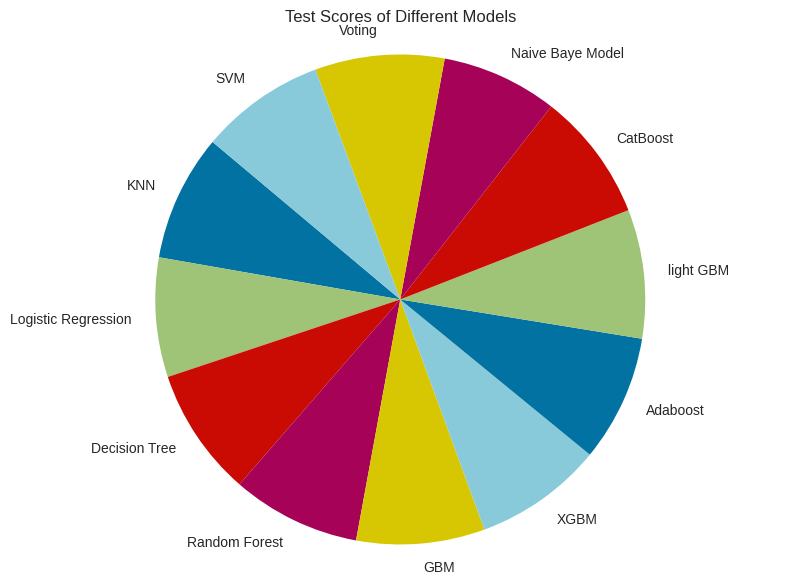

In [ ]:
data = [["KNN", KNN_train_score, KNN_test_score, KNN_f1_train, KNN_f1_test, KNN_recall_train, KNN_recall_test, KNN_mse_train, KNN_mse_test],
        ["Logistic Regression", lg_train_score, lg_test_score, lg_f1_train, lg_f1_test, lg_recall_train, lg_recall_test,lg_mse_train, lg_mse_test],
        ["Decision Tree", dt_train_score, dt_test_score, dt_f1_train, dt_f1_test, dt_recall_train, dt_recall_test, dt_mse_train, dt_mse_test],
        ["Random Forest", rf_train_score, rf_test_score, rf_f1_train, rf_f1_test, rf_recall_train, rf_recall_test, rf_mse_train, rf_mse_test],
        ["GBM", SKGB_train_score, SKGB_test_score, SKGB_f1_train, SKGB_f1_test, SKGB_recall_train, SKGB_recall_test, SKGB_mse_train, SKGB_mse_test],
        ["XGBM", xgb_train_score, xgb_test_score, xgb_f1_train, xgb_f1_test, xgb_recall_train, xgb_recall_test, xgb_mse_train, xgb_mse_test],
        ["Adaboost", ab_train_score, ab_test_score, ab_f1_train, ab_f1_test, ab_recall_train, ab_recall_test, ab_mse_train, ab_mse_test],
        ["light GBM", lgb_train, lgb_test, lgb_f1_train, lgb_f1_test, lgb_recall_train, lgb_recall_test, lgb_mse_train, lgb_mse_test],
        ["CatBoost", cb_train_score, cb_test_score, cb_f1_train, cb_f1_test, cb_recall_train, cb_recall_test, cb_mse_train, cb_mse_test],
        ["Naive Baye Model", BNB_train_score, BNB_train_score, BNB_test_score, BNB_f1_train, BNB_f1_test, BNB_recall_train, BNB_recall_test, BNB_mse_train, BNB_mse_test],
        ["Voting", voting_train_score, voting_train_score, voting_test_score, voting_f1_train, voting_f1_test, voting_recall_train, voting_recall_test, voting_mse_train, voting_mse_test],
        ["SVM", SVM_train_score, SVM_train_score, SVM_test_score, SVM_f1_train, SVM_f1_test, SVM_recall_train, SVM_recall_test, SVM_mse_train, SVM_mse_test]]

col_names = ["Model", "Train Score", "Test Score", "f1 Score(train)", "f1 score(test)", "Recall Score(train)", "Recall Score(test)", "Mean squarred Error(train)", "Mean Squarred Error(test)"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

# Extract models and their test scores
models = [row[0] for row in data]
test_scores = [row[2] for row in data]

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(test_scores, labels=models, startangle=140)
plt.title("Test Scores of Different Models")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()